# Plot

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
from matplotlib import rc
rc('text', usetex=True)
from scipy.io import loadmat

In [3]:
%matplotlib inline

In [4]:
h=6.626e-34
hbar=h/2/np.pi
Qe=1.608e-19

### Load mat files

In [5]:
loaded_data=loadmat("merged.mat")

In [6]:
list(loaded_data.keys())

['__header__',
 '__version__',
 '__globals__',
 'IDC',
 'IRF',
 'PRF',
 'A',
 'eta',
 'f_rf',
 'C',
 'V',
 'DVDI',
 'Ic_max']

In [8]:
A=loaded_data['A'][...]
print(A.shape)
C=loaded_data['C'][...]
print(C.shape)
DVDI=loaded_data['DVDI'][...]
print(DVDI.shape)
IDC=loaded_data['IDC'][...]
print(IDC.shape)
V=loaded_data['V'][...]
print(V.shape)
eta=loaded_data['eta'][...]
print(eta.shape)
Ic_max=loaded_data['Ic_max'][...]
print(Ic_max.shape)

(1, 12)
(1, 12)
(201, 201, 12)
(1, 201)
(201, 201, 12)
(1, 12)
(1, 12)


### Plot map and save data

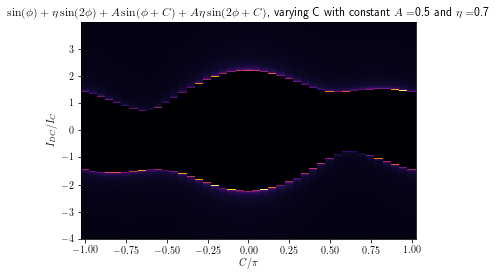

In [70]:
#plt.figure()
#plt.pcolor(C/np.pi,IDC_array/Ic,np.transpose(DVDI),cmap='inferno',shading='auto')
#plt.xlabel("$C/\pi$")
#plt.ylabel("$I_{DC}/I_C$")
#plt.title("$\sin(\phi)+\eta\sin(2\phi)+A\sin(\phi+C)+A\eta\sin(2\phi+C)$, varying C with constant $A=$"+str(A)+" and $\eta=$"+str(eta))
#plt.savefig("./eta0p7_A0p5/two_channels_A0p5_eta_0p7_step_0p005_41ptC.pdf")

#savemat("./eta0p7_A0p5/simulation_dVdI_vs_C_constant_A_0p5_eta_0p7_two_channels_step_0p005.mat",mdict={'IDC':IDC_array,'C':C,'V':V,'DVDI':DVDI})


## Load Data and Plot

### Convert mat to hdf5

In [12]:
from scipy.io import loadmat, savemat
import h5py
import os

### Merge the mat file into a single mat file

In [21]:
import sys
sys.path.insert(0, '/Users/mingtsoweii/GitHub/data_file_manipulations/')

import files_manipulation

In [8]:
import importlib

In [9]:
importlib.reload(data_maniputation)

<module 'data_maniputation' from '/Users/mingtsoweii/GitHub/load_multiple_data-save_mat/data_maniputation.py'>

In [10]:
dataDir = "./several_eta_A/"
files_manipulation.merge_multiple_mat(dataDir,True)


IDC.shape=(1600,)
C.shape=(41,)
V.shape=(41, 1600, 121)
DVDI.shape=(41, 1600, 121)
eta.shape=(121,)
A.shape=(121,)


In [187]:
A=np.array([1.00,2.00,3.00])
B=np.array([1,2,3])
np.all ((A==B),axis=0)

True

In [97]:
dataDir = "./several_eta_A/"
merged_data={}

sorted_file_list=sorted(os.listdir(dataDir)) # sort the file list first by name
#print(sorted_file_list)
for file in sorted_file_list:
    d=loadmat(dataDir+file)
    if merged_data=={}:
        merged_data=d.copy()
        merged_data.pop('__globals__')
        merged_data.pop('__header__')
        merged_data.pop('__version__')
        for i in merged_data.keys():
            merged_data[i]=np.squeeze(merged_data[i])
            if i in ['A','eta']:
                merged_data[i]=np.round(merged_data[i],3)
    else:
        for i in d.keys():
            if i not in ['__globals__',  '__header__', '__version__','IDC','C']:
                if i in ['A','eta']:
                    merged_data[i]=np.dstack((merged_data[i],np.squeeze(np.round(d[i],3))))                
                else:
                    merged_data[i]=np.dstack((merged_data[i],np.squeeze(d[i])))                

for i in merged_data.keys():
    merged_data[i]=np.squeeze(merged_data[i])
    print(str(i)+"_"+str(merged_data[i].shape))
savemat('merged.mat',merged_data)

IDC_(1600,)
C_(41,)
V_(41, 1600, 121)
DVDI_(41, 1600, 121)
eta_(121,)
A_(121,)


In [99]:
merged_data['IDC']

array([-8.00e-06, -7.99e-06, -7.98e-06, ...,  7.97e-06,  7.98e-06,
        7.99e-06])

### Convert the merged mat to the h5 format

In [13]:
file="merged.mat"
with h5py.File(file[:-4] + '.h5', 'w') as fd:
    for i in merged_data.keys():
        fd[i] = merged_data[i]
    fd.close()

### Convert all the mat files to the hdf5 format

In [278]:
dataDir = "./several_eta_A/"

h5Dir="./several_eta_A_h5/"
for file in os.listdir( dataDir ):
    d=loadmat(dataDir+file)
    with h5py.File(h5Dir+file[:-4] + '.h5', 'w') as fd:
        for i in d.keys():
            if i not in ['__globals__',  '__header__', '__version__']:
                fd[i] = np.squeeze(d[i])
    fd.close()

### Load hdf5

In [13]:
#for file in os.listdir( h5Dir ):
fd= h5py.File('merged.h5','r')

In [148]:
list(fd.keys())

['A', 'C', 'DVDI', 'IDC', 'V', 'eta']

In [14]:
A=fd['A'][...]
print(A.shape)
C=fd['C'][...]
print(C.shape)
DVDI=fd['DVDI'][...]
print(DVDI.shape)
IDC=fd['IDC'][...]
print(IDC.shape)
V=fd['V'][...]
print(V.shape)
eta=fd['eta'][...]
print(eta.shape)

(121,)
(41,)
(41, 1600, 121)
(1600,)
(41, 1600, 121)
(121,)


### Plot all the $R(I_{DC}, C)$ maps

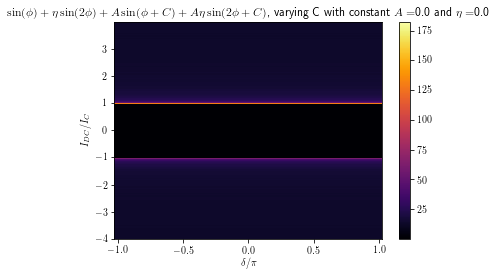

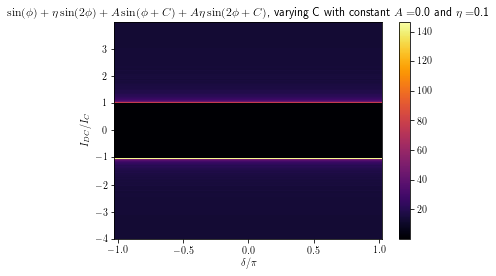

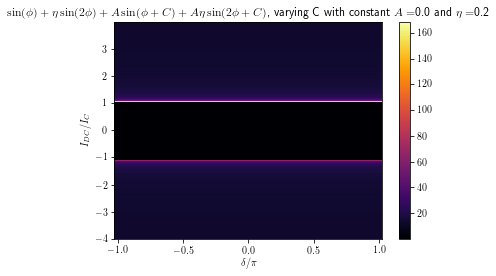

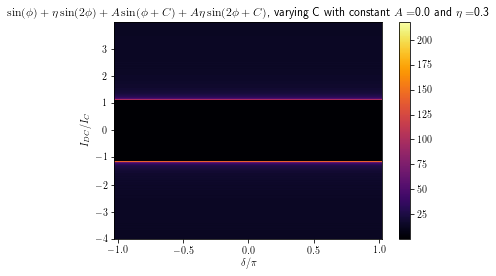

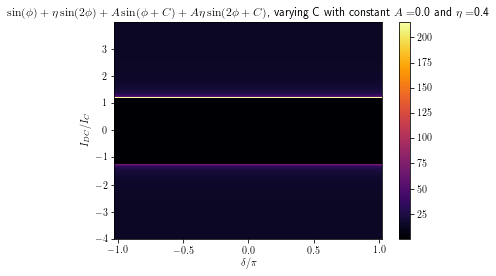

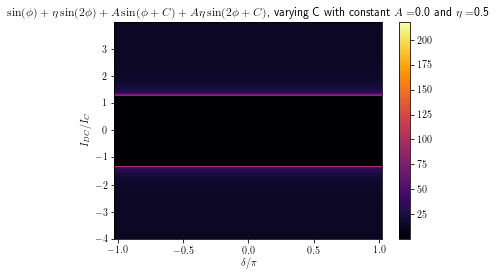

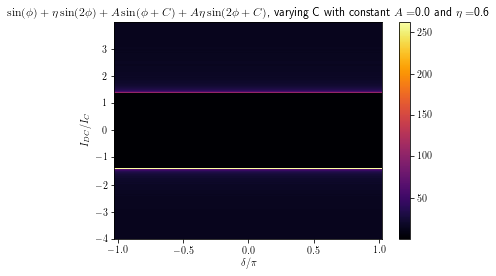

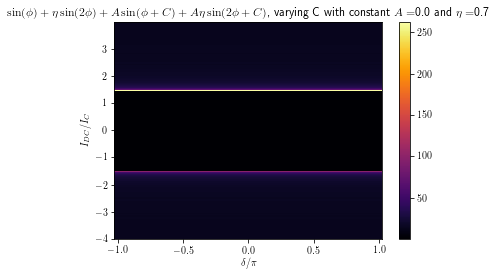

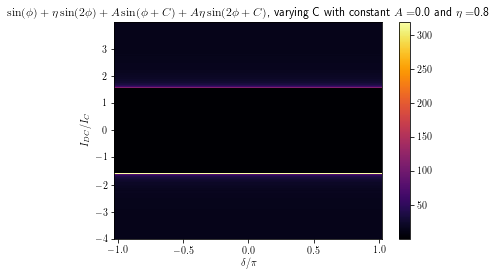

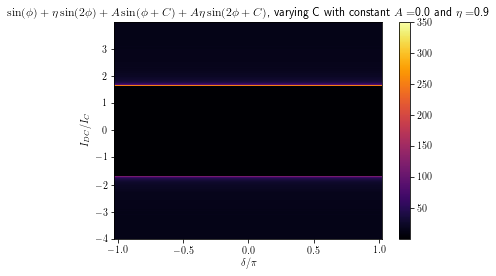

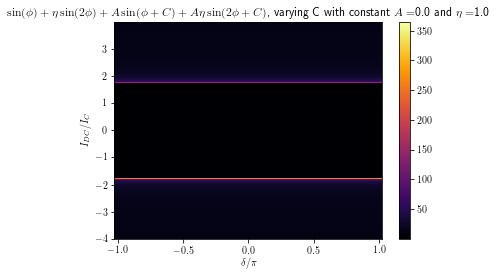

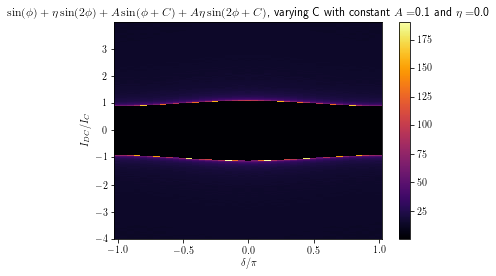

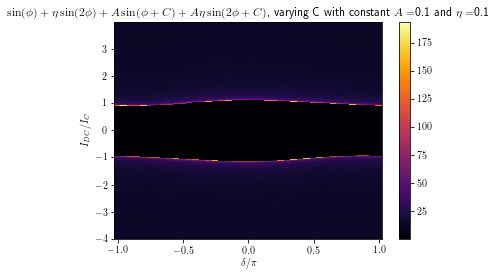

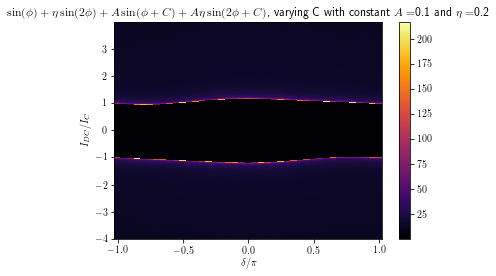

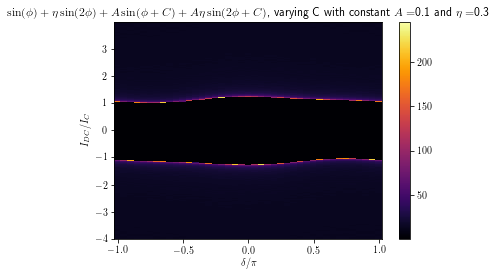

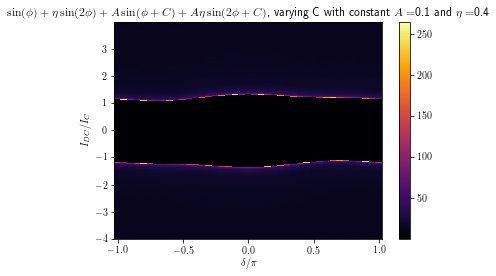

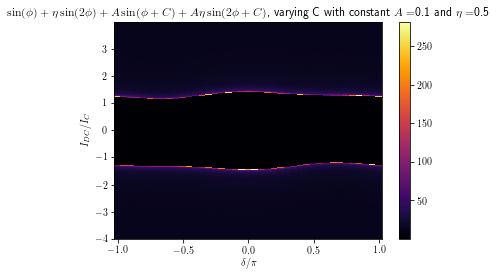

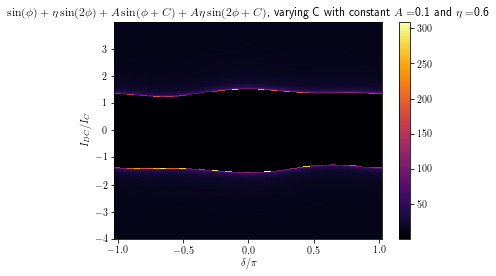

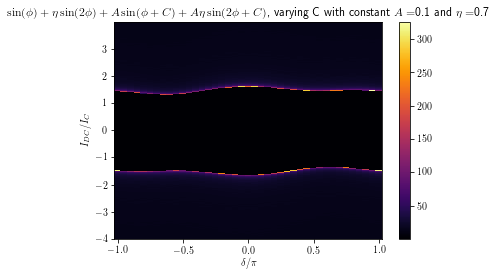

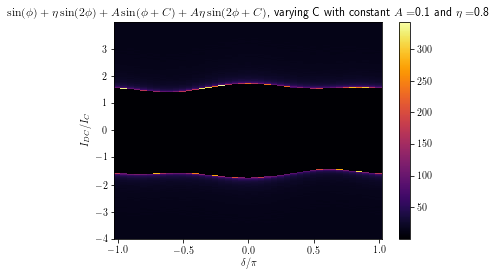

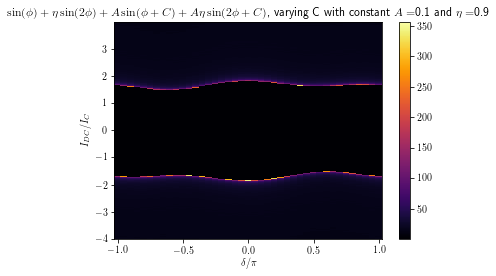

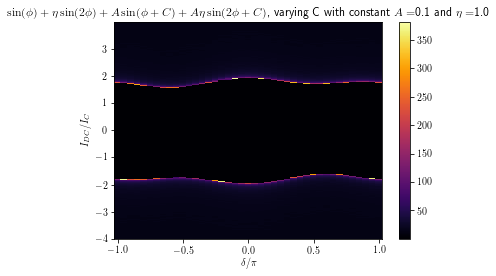

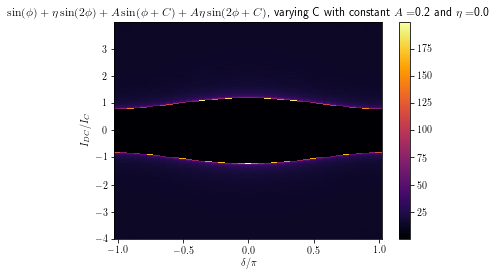

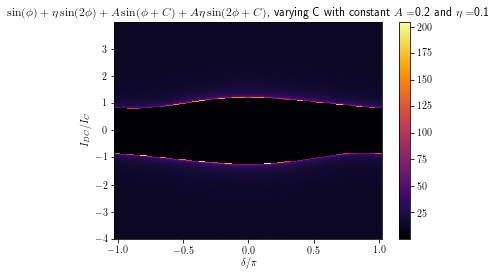

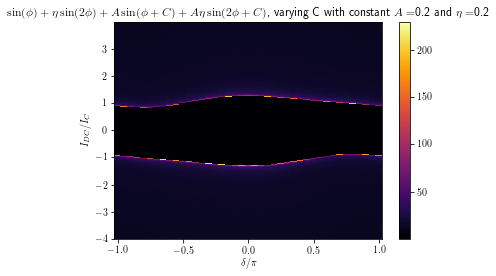

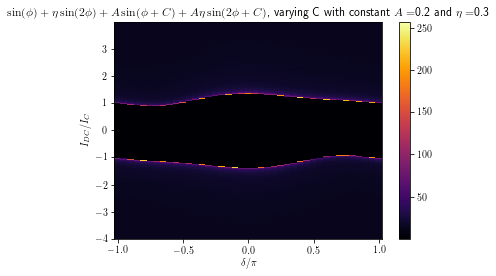

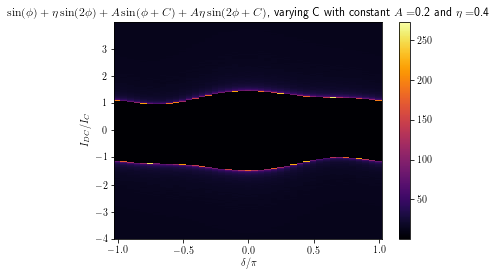

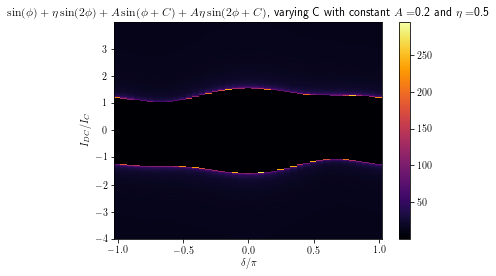

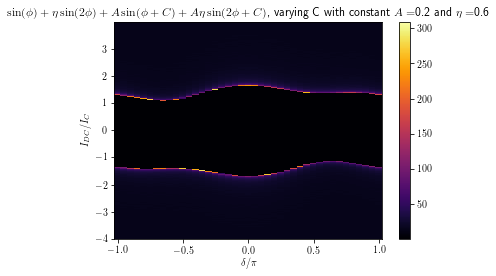

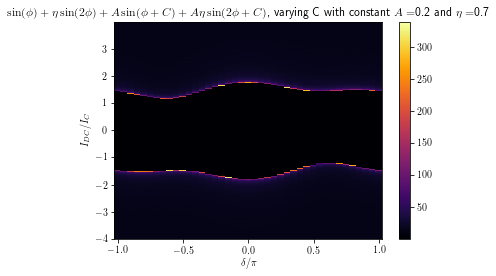

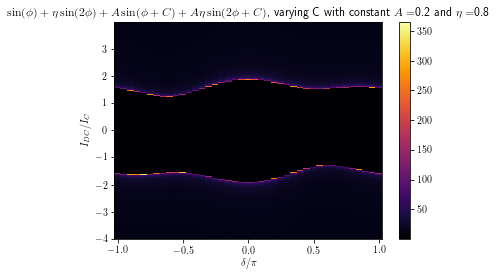

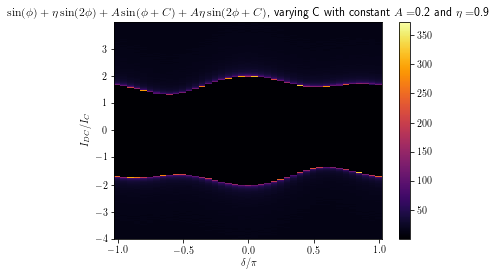

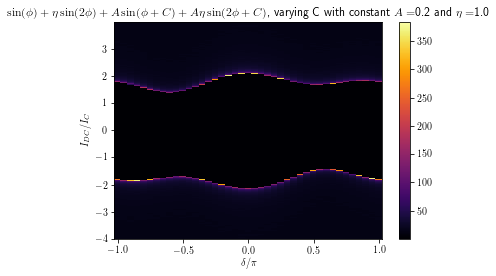

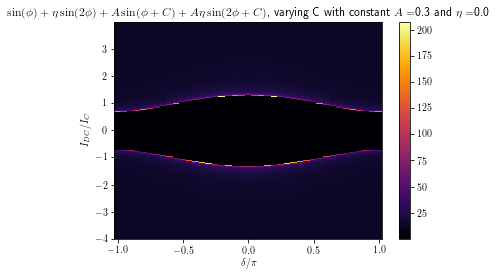

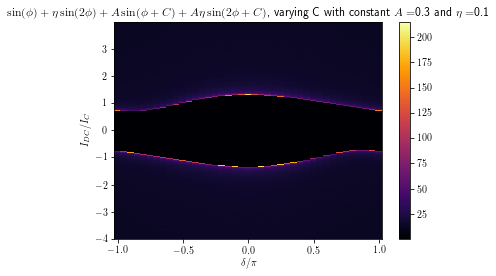

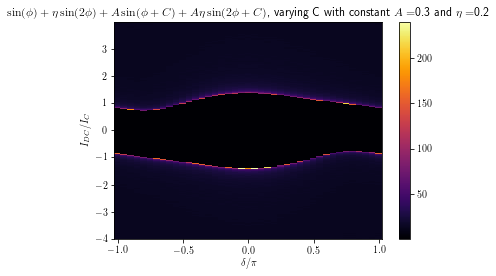

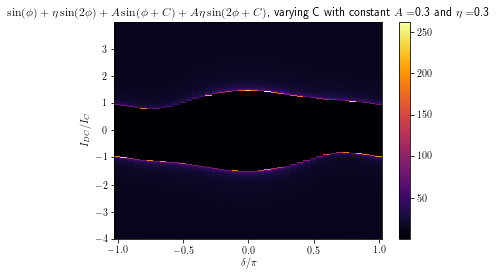

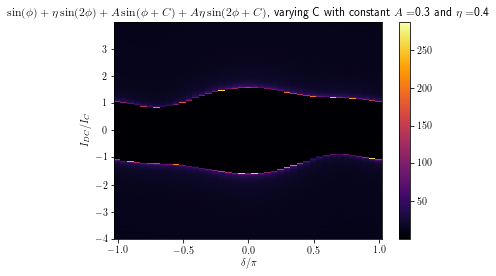

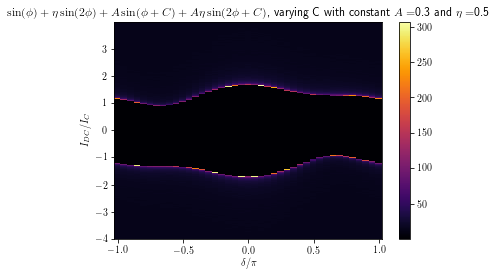

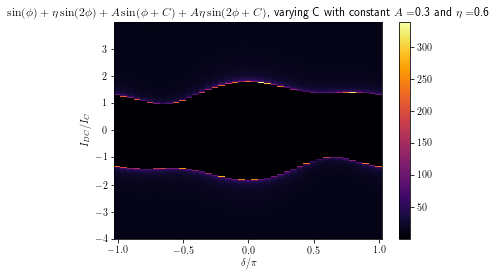

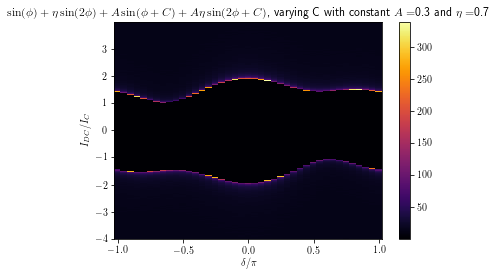

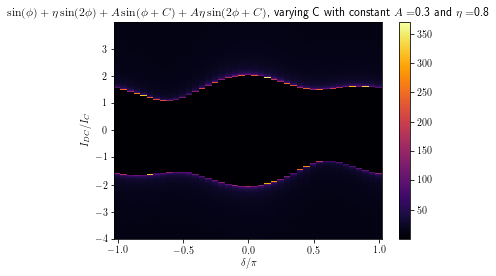

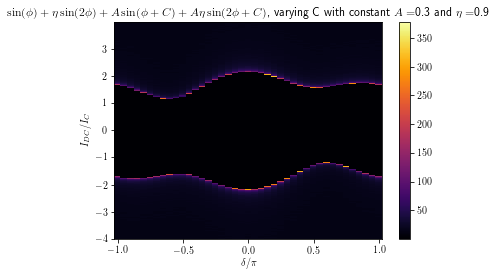

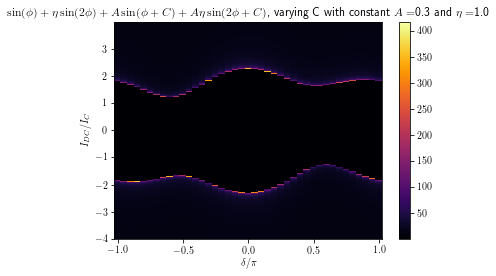

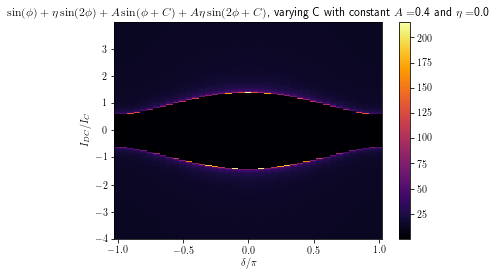

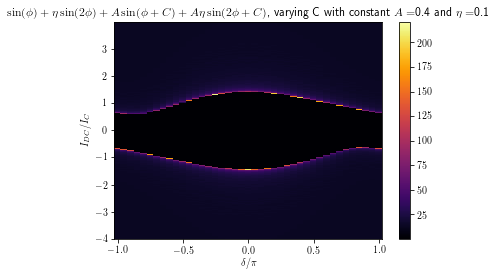

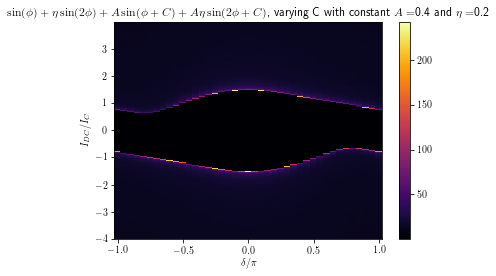

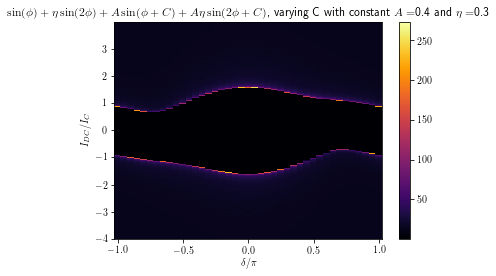

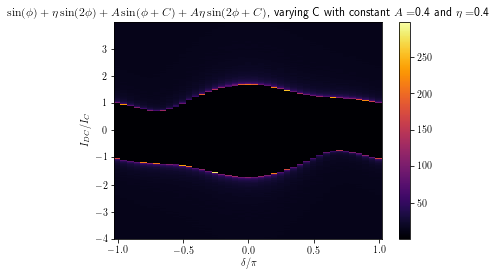

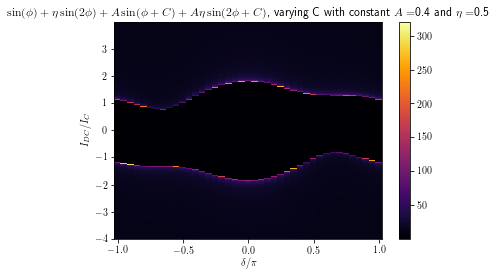

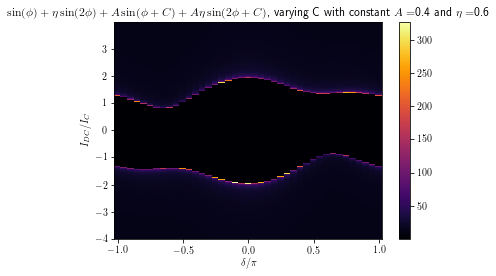

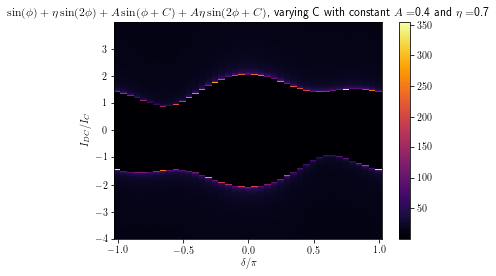

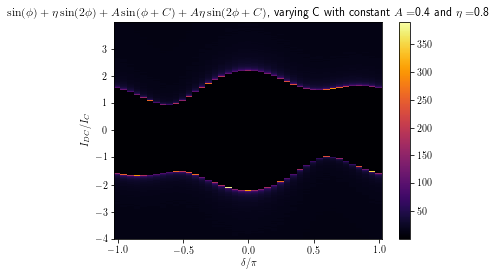

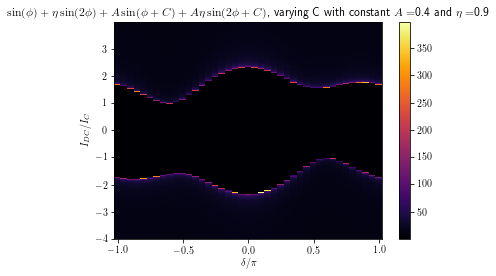

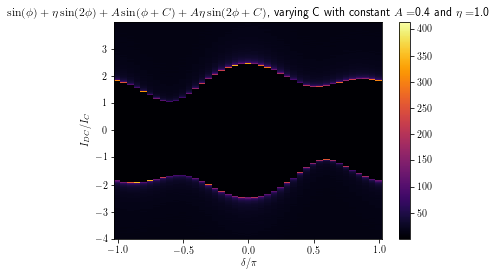

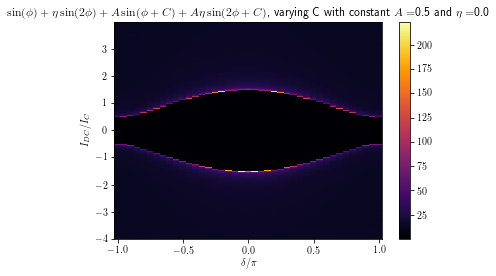

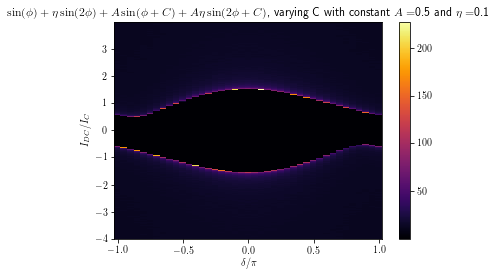

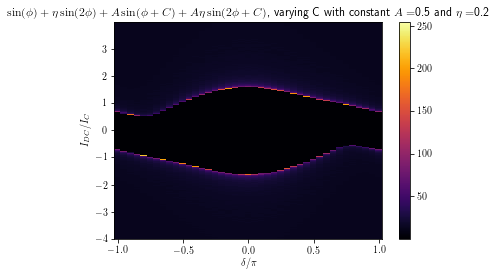

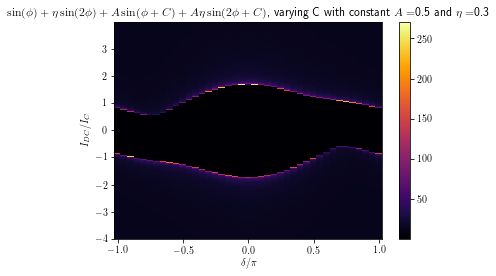

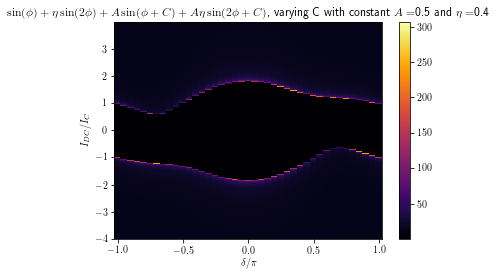

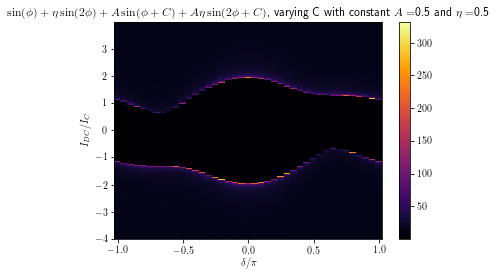

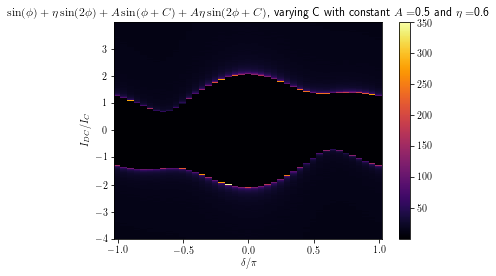

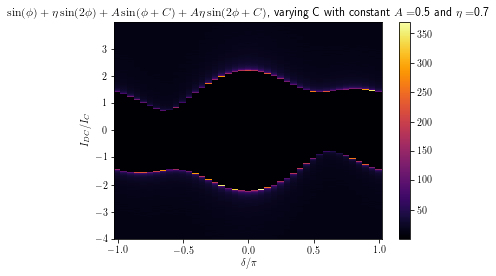

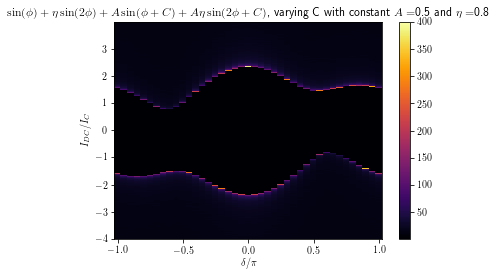

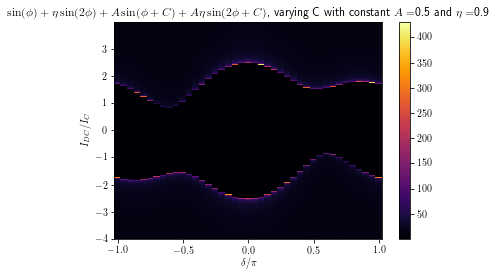

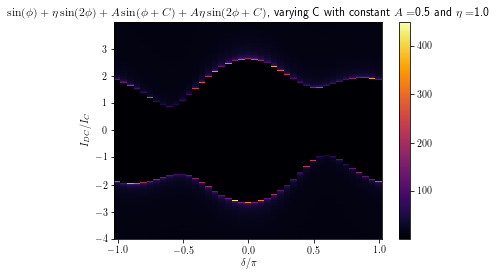

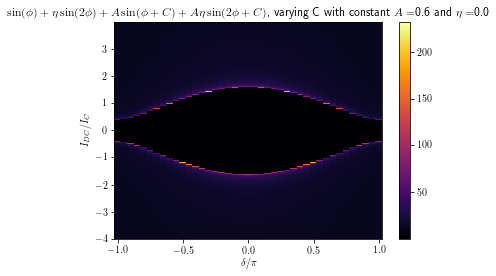

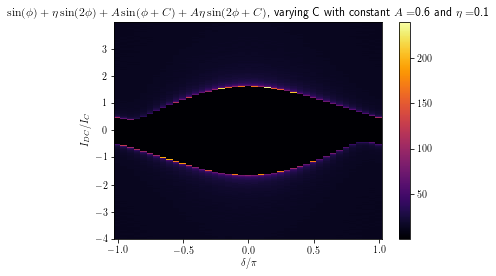

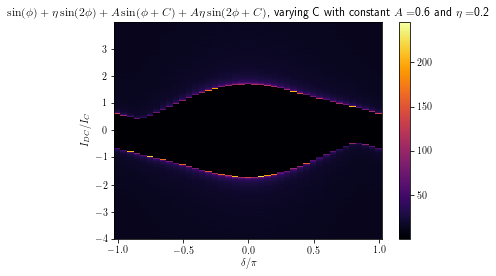

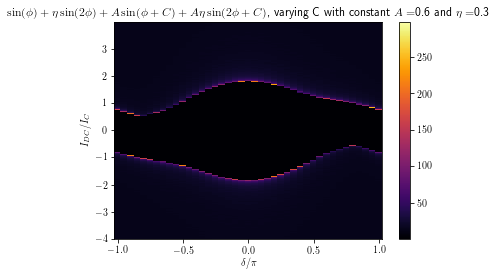

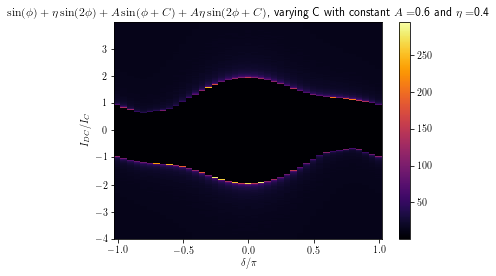

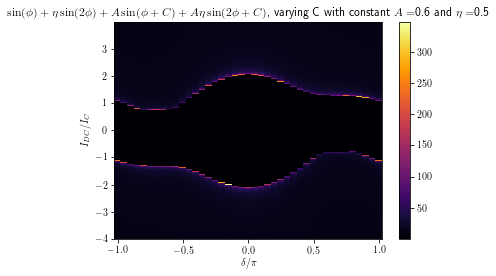

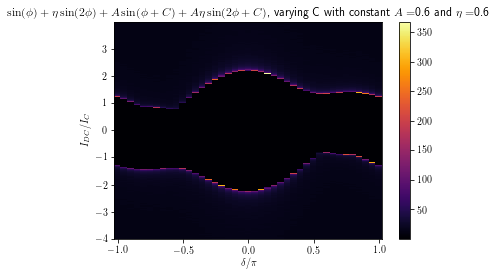

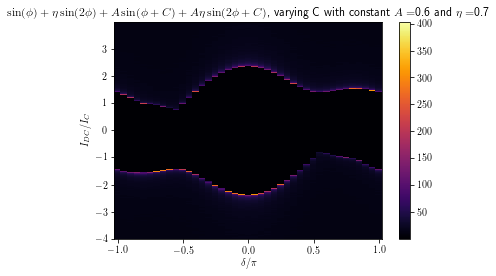

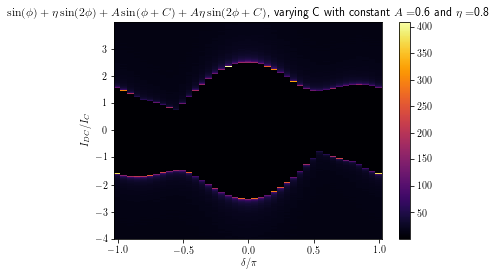

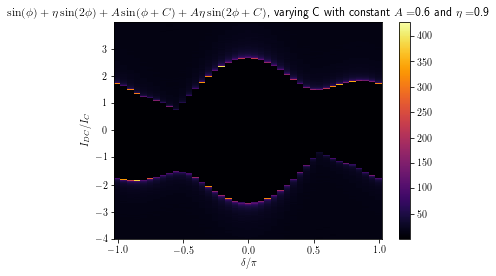

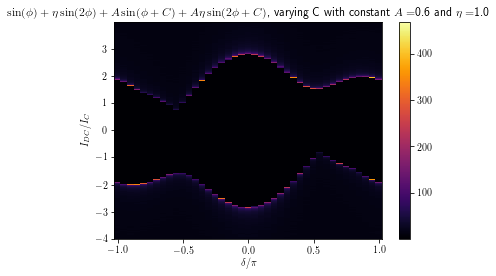

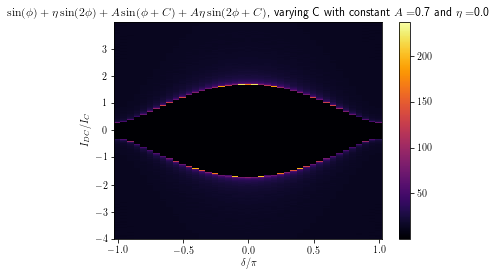

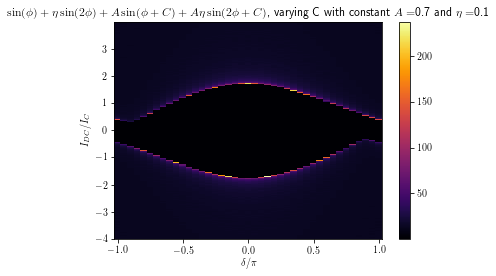

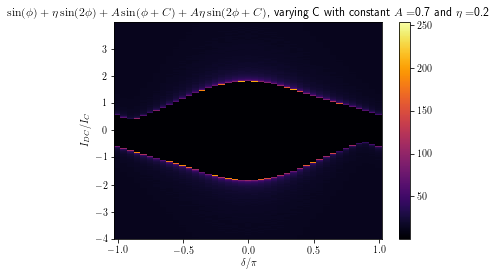

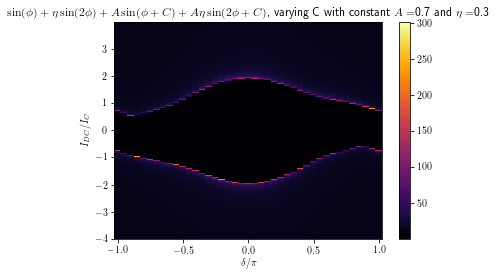

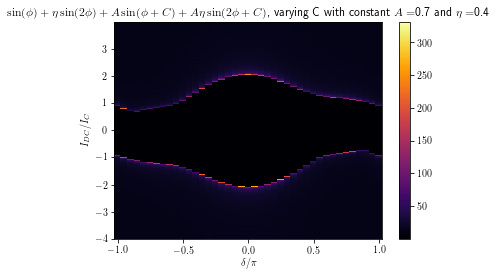

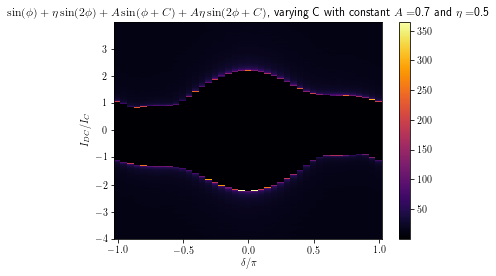

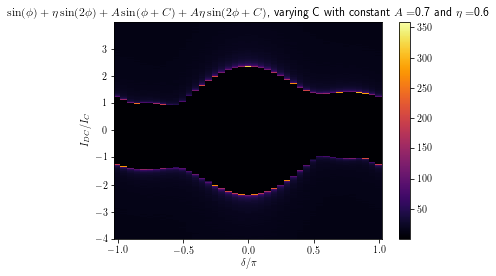

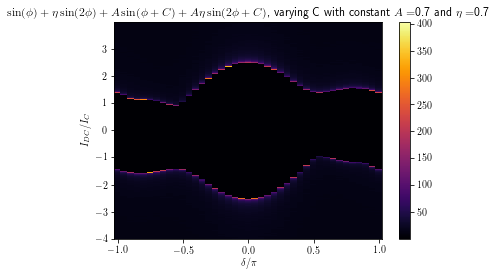

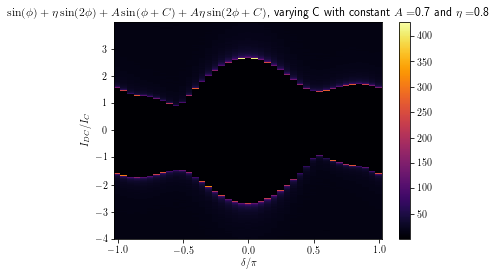

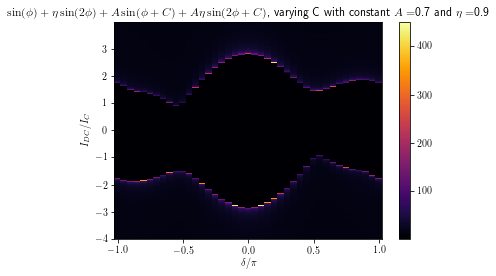

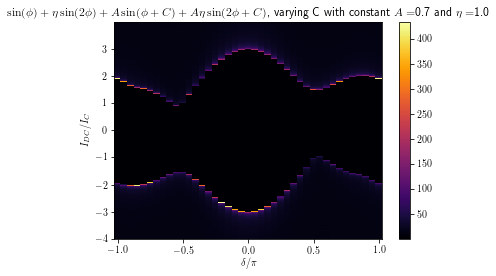

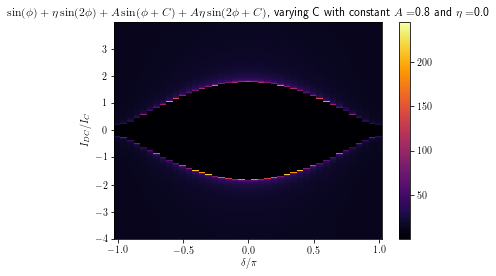

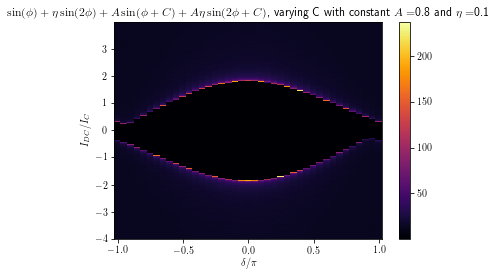

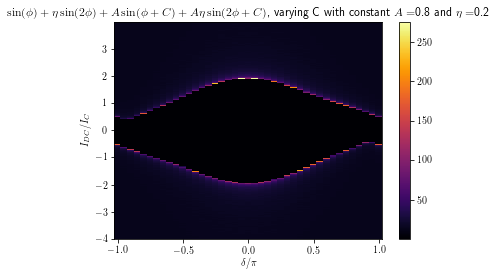

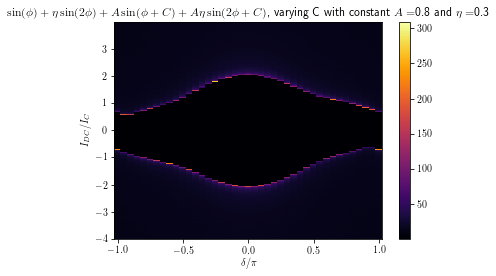

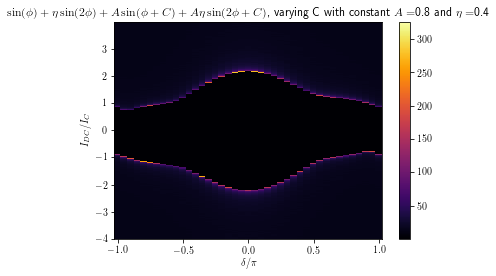

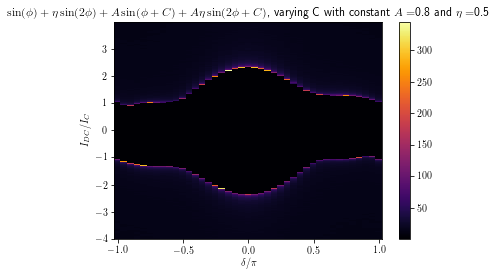

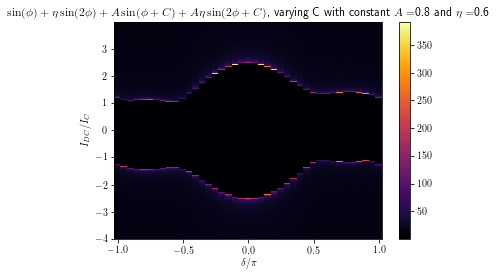

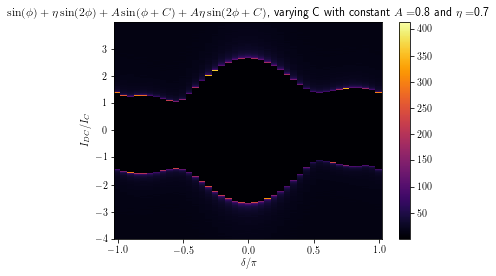

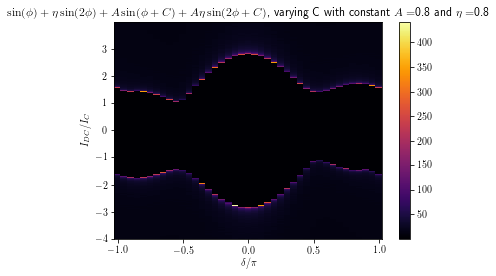

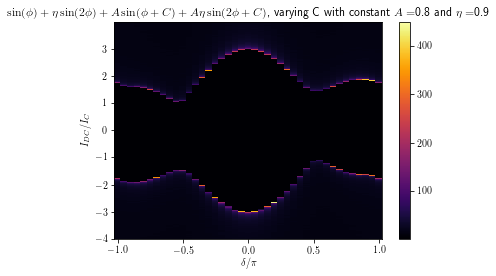

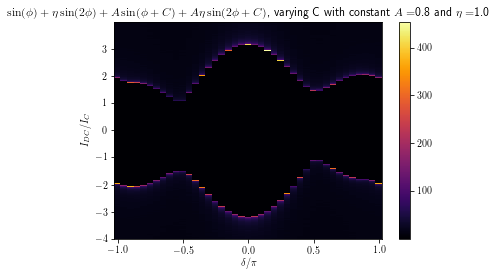

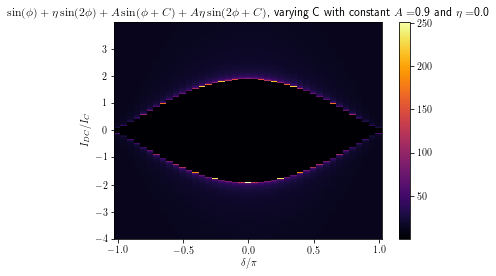

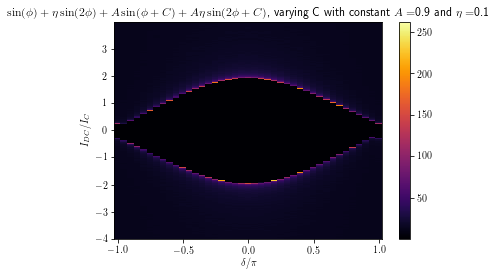

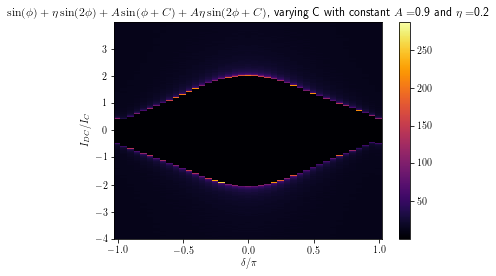

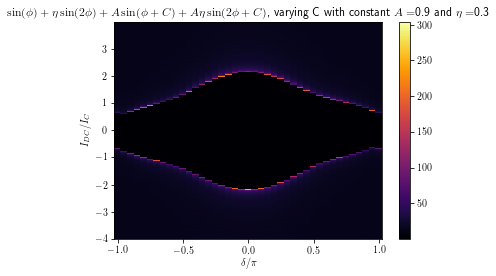

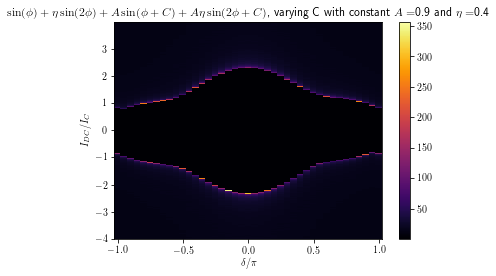

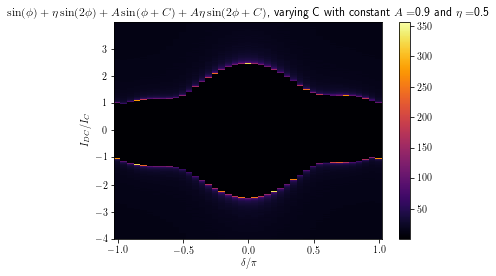

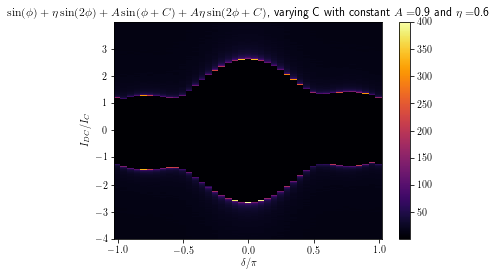

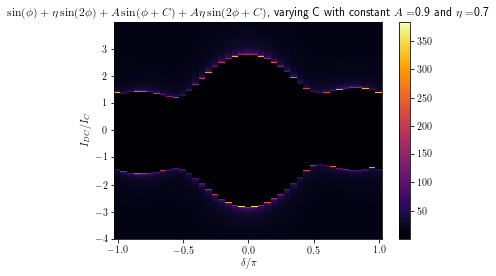

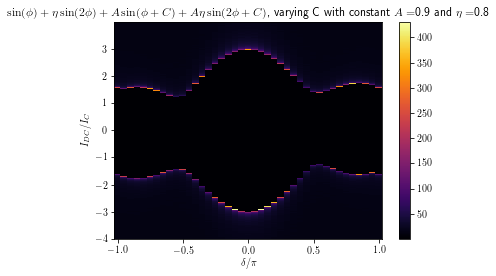

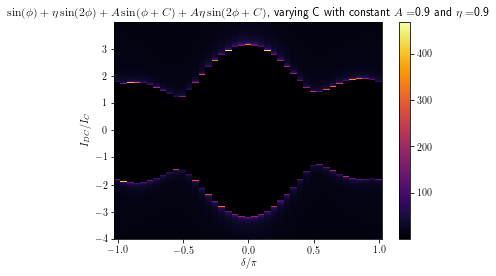

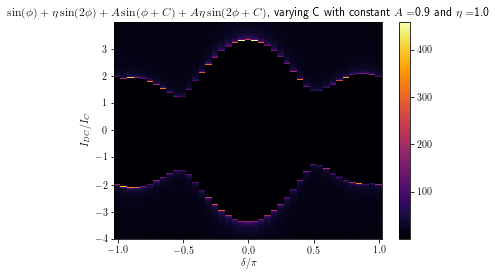

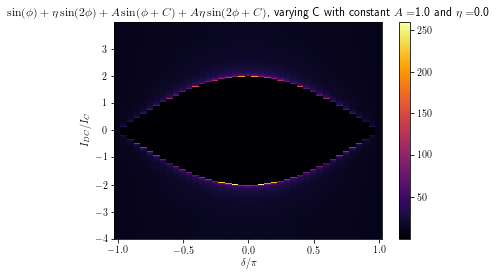

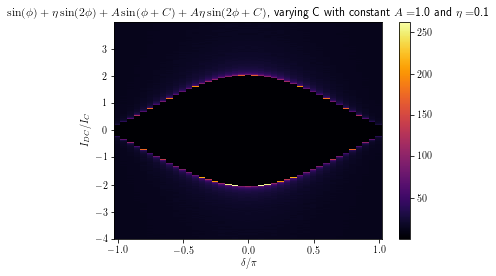

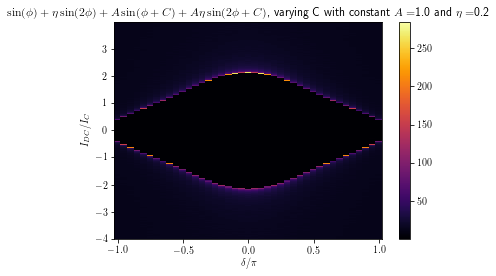

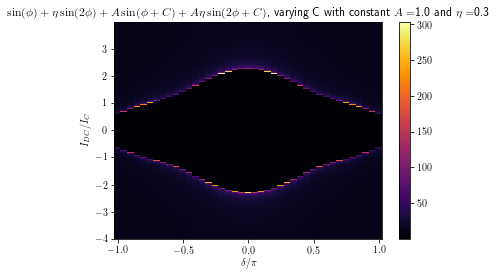

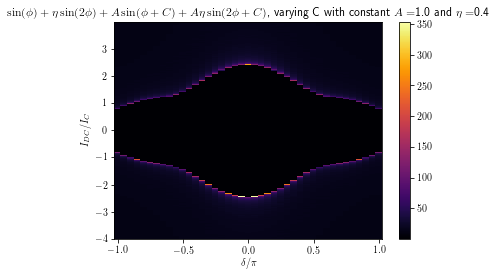

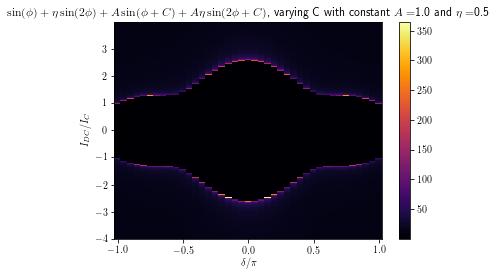

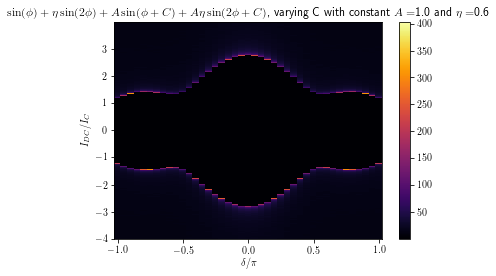

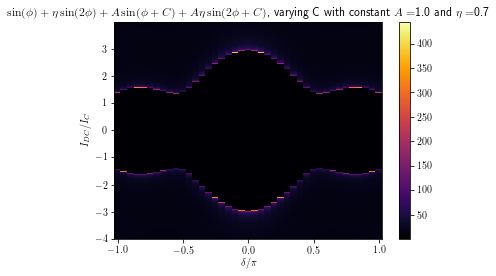

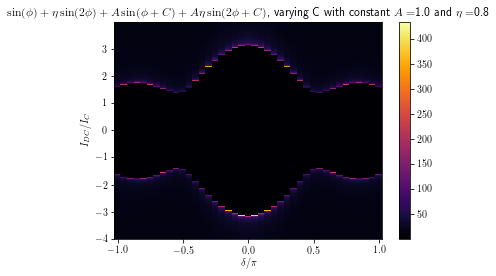

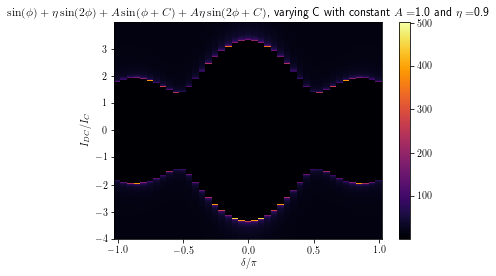

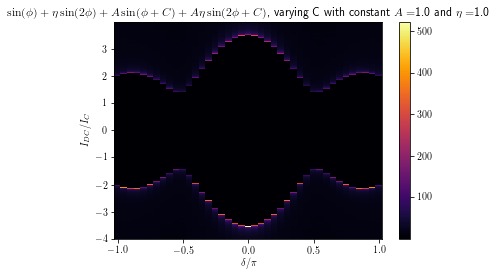

In [522]:
plt.figure()
for i in range(0,len(eta)):
    plt.pcolor(C/np.pi,IDC/Ic,np.squeeze(np.transpose(DVDI[:,:,i])),cmap='inferno',linewidth=0,rasterized=True,shading='auto')
    plt.xlabel("$\delta/\pi$")
    plt.ylabel("$I_{DC}/I_C$")
    plt.colorbar()

    plt.title("$\sin(\phi)+\eta\sin(2\phi)+A\sin(\phi+C)+A\eta\sin(2\phi+C)$, varying C with constant $A=$"+str(A[i])+" and $\eta=$"+str(eta[i]))
    plt.show()
#plt.savefig("./eta0p7_A0p5/two_channels_A0p5_eta_0p7_step_0p005_41ptC.pdf")


### Find $I_{C+}$, $I_{C-}$, asymmetry, and peak heights

In [29]:
from scipy.signal import find_peaks

In [15]:
Icn=np.empty([len(C),len(eta)])
Icp=np.empty([len(C),len(eta)])
peak_n=np.empty([len(C),len(eta)])
peak_p=np.empty([len(C),len(eta)])
asymmetry=np.empty([len(C),len(eta)])

for j in range(0,len(eta)):
    for i in range(0,len(C)):
        #grad=np.abs(np.squeeze(np.gradient(DVDI[i,:,j]))) # find the sharpest step
        Index, _ =find_peaks(grad,distance=len(IDC)//100,height=(np.max(grad)-np.min(grad)/2))
        #Index, Height=find_peaks(grad,distance=30,height=5)#prominence=2)#
        if len(Index)==2:
            Icn[i,j]=np.abs(IDC[Index[0]])
            Icp[i,j]=np.abs(IDC[Index[1]])
            asymmetry[i,j]=Icp[i,j]/Icn[i,j]
        elif len(Index)>2:
            print("C= "+str(np.round(C[i]/np.pi,3))+"*pi has more than one peak: "+str(C[i])+" at "+str(Index))
        elif len(Index)==1:
            Icn[i,j]=np.abs(IDC[Index[0]])
            Icp[i,j]=0 #np.abs(IDC[Index[1]])
            asymmetry[i,j]=1#Icp[i,j]/Icn[i,j]
            print("only one peak found")
        else:
            Icn[i,j]=0 #np.abs(IDC[Index[0]])
            Icp[i,j]=0 #np.abs(IDC[Index[1]])
            asymmetry[i,j]=1#Icp[i,j]/Icn[i,j]
            print("No peak found at C="+str(C[i]/np.pi)+"$\pi$, eta="+str(eta[j])+", A="+str(A[j]))

NameError: name 'find_peaks' is not defined

In [16]:
import sys
sys.path.insert(0, '/Users/mingtsoweii/GitHub/Josephson-junction-simulations/')

import extract_Ic_and_peak

In [17]:
import importlib

In [18]:
importlib.reload(extract_Ic_and_peak)

<module 'extract_Ic_and_peak' from '/Users/mingtsoweii/GitHub/Josephson-junction-simulations/extract_Ic_and_peak.py'>

### Find $I_{C+}$ and $I_{C-}$ 

Cannot find exactly two peaks within 1000 recursions
-1.000000000003249 0.0 0.0 0.0


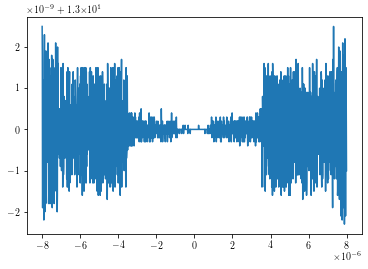

Cannot find exactly two peaks within 1000 recursions
1.000000000003249 0.0 0.0 0.0


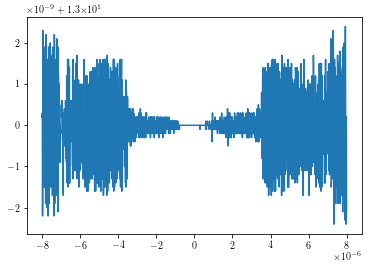

In [19]:
Icn=np.empty([len(C),len(eta)])
Icp=np.empty([len(C),len(eta)])
asymmetry=np.empty([len(C),len(eta)])

for j in range(0,len(eta)):
    for i in range(0,len(C)):
        #Icn[i,j],Icp[i,j],peak_n[i,j],peak_p[i,j]=
        distance_guess=len(np.squeeze(DVDI[i,:,j]))//100
        height_guess=float(DVDI[i,0,j])
        Icn[i,j],Icp[i,j]=extract_Ic_and_peak.extract_Ic(IDC,np.squeeze(DVDI[i,:,j]),distance_guess,height_guess)
        if(Icn[i,j]==0):
            print(C[i]/np.pi,eta[j],Icn[i,j],Icp[i,j])
            plt.figure()
            plt.plot(IDC,DVDI[i,:,j])
            plt.show()
            asymmetry[i,j]=1
        else:
            asymmetry[i,j]=Icp[i,j]/Icn[i,j]

### Find peak heights

Cannot find exactly two peaks within 1000 recursions
-1.0 0.0 0.0 0.0


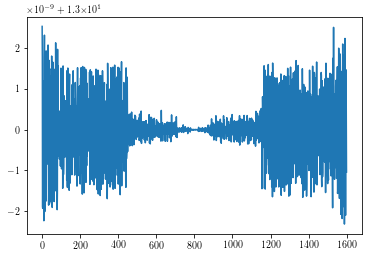

Cannot find exactly two peaks within 1000 recursions
1.0000000000000018 0.0 0.0 0.0


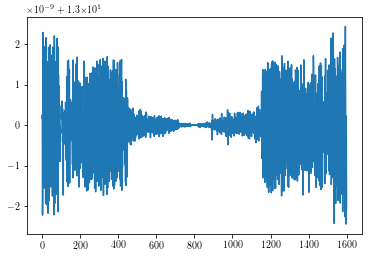

In [79]:
peak_n=np.empty([len(C),len(eta)])
peak_p=np.empty([len(C),len(eta)])
for j in range(0,len(eta)):
    for i in range(0,len(C)):
        #Icn[i,j],Icp[i,j],peak_n[i,j],peak_p[i,j]=
        distance_guess=len(np.squeeze(DVDI[i,:,j]))//50
        height_guess=float(DVDI[i,0,j])*3
        peak_n[i,j],peak_p[i,j]=extract_Ic_and_peak.extract_height(np.squeeze(DVDI[i,:,j]),distance_guess,height_guess)
        if(peak_n[i,j]==0):
            print(C[i]/np.pi,eta[j],peak_n[i,j],peak_p[i,j])
            plt.figure()
            plt.plot(DVDI[i,:,j])
            plt.show()

### Plot peak heights vs C, grouped by the same A

<Figure size 432x288 with 0 Axes>

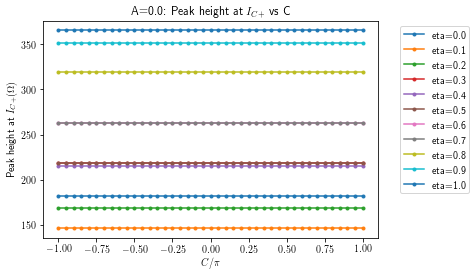

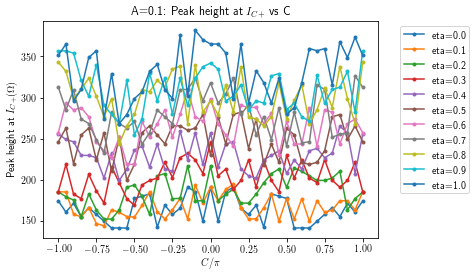

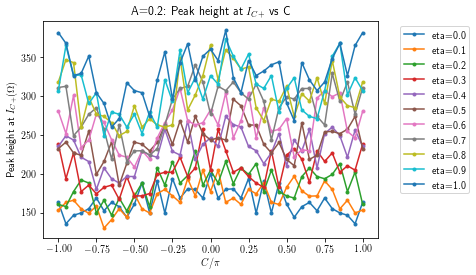

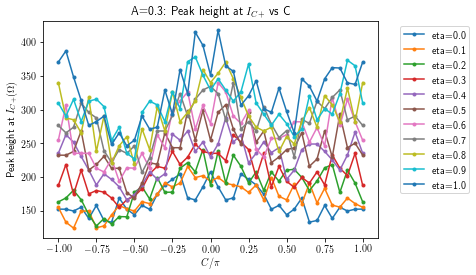

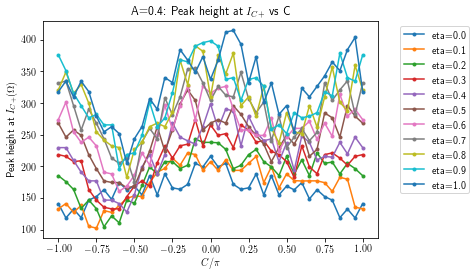

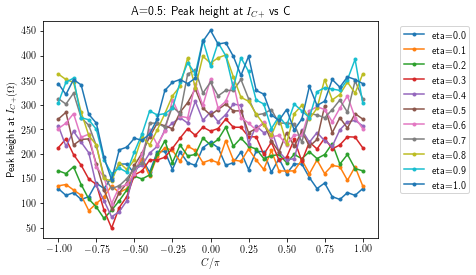

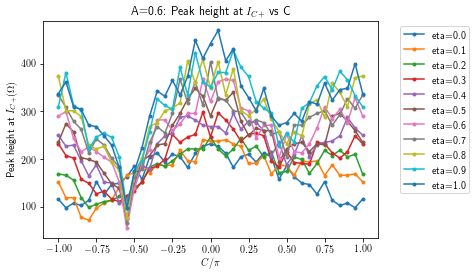

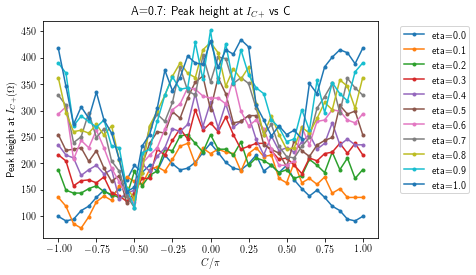

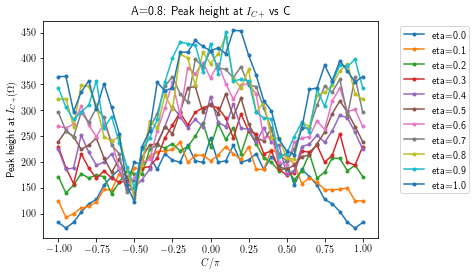

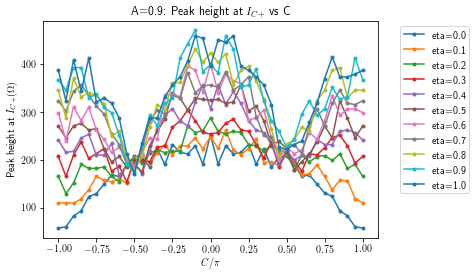

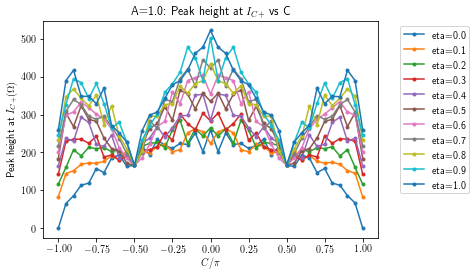

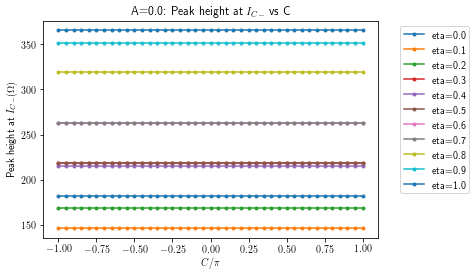

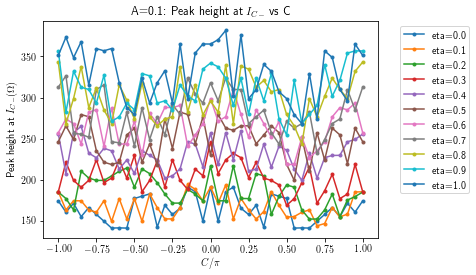

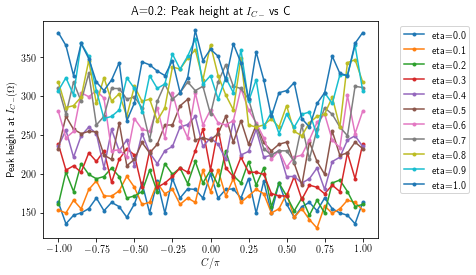

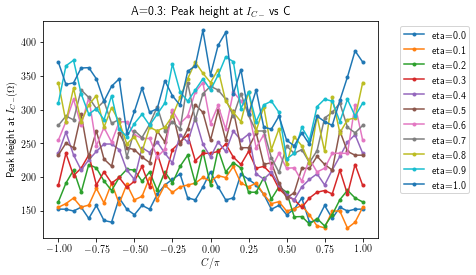

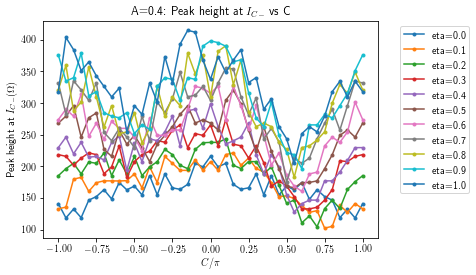

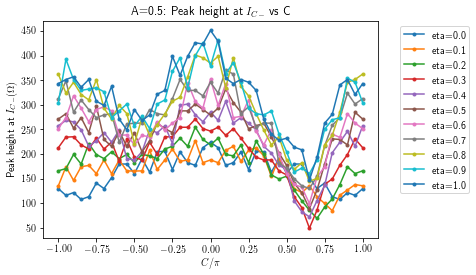

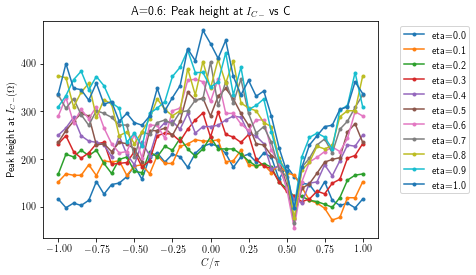

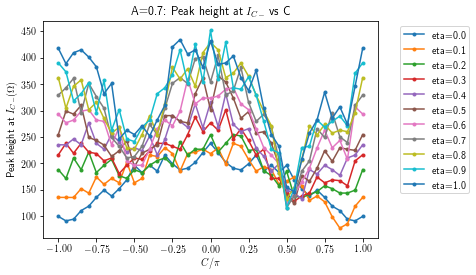

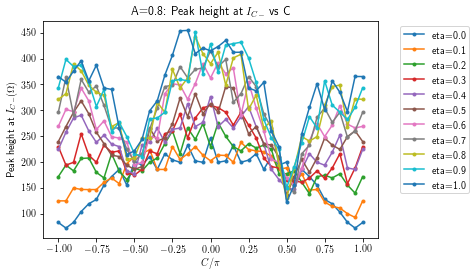

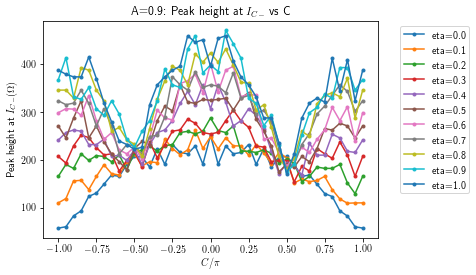

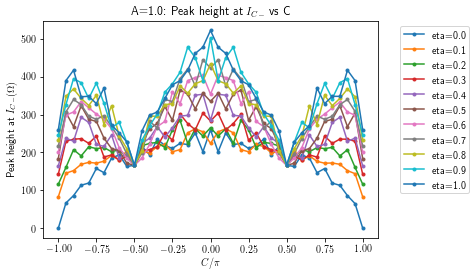

In [82]:
plt.figure()
for j in range(0,11):
    plt.figure()
    for i in range(0+j*11,(j+1)*11): 
        plt.plot(C/np.pi,peak_p[:,i],'.-',label='eta='+str(eta[i]))

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('A='+str(A[0+j*11])+': Peak height at $I_{C+}$ vs C')
    plt.xlabel('$C/\pi$')
    plt.ylabel('Peak height at $I_{C+}(\Omega)$')
    plt.show()

for j in range(0,11):
    plt.figure()
    for i in range(0+j*11,(j+1)*11): 
        plt.plot(C/np.pi,peak_n[:,i],'.-',label='eta='+str(eta[i]))

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('A='+str(A[0+j*11])+': Peak height at $I_{C-}$ vs C')
    plt.xlabel('$C/\pi$')
    plt.ylabel('Peak height at $I_{C-}(\Omega)$')
    plt.show()


### Plot peak heights vs C, grouped by the same eta

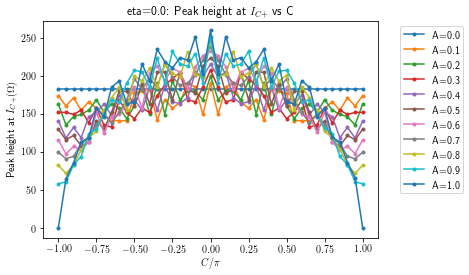

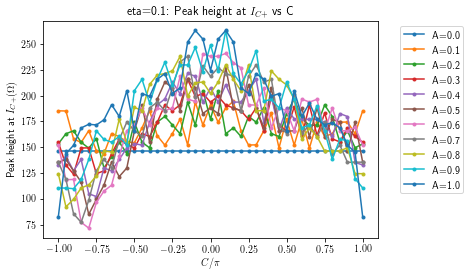

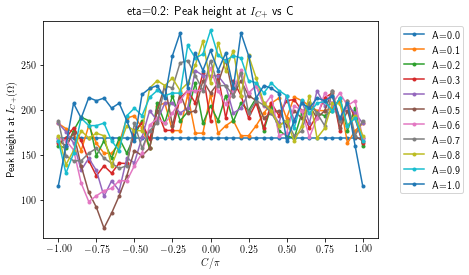

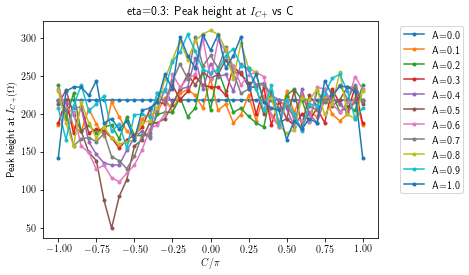

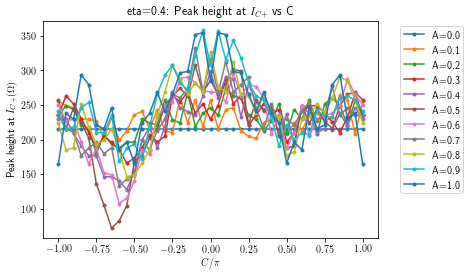

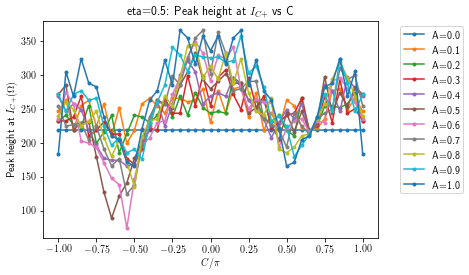

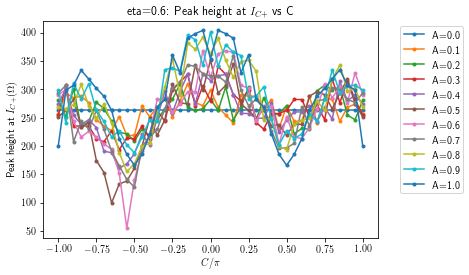

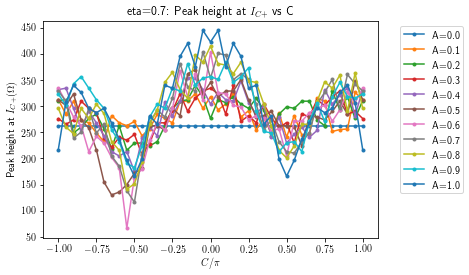

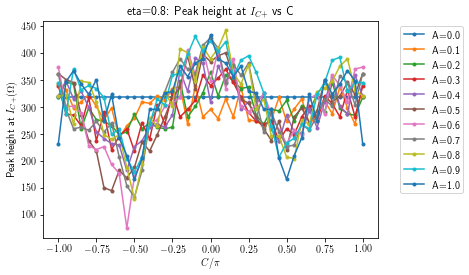

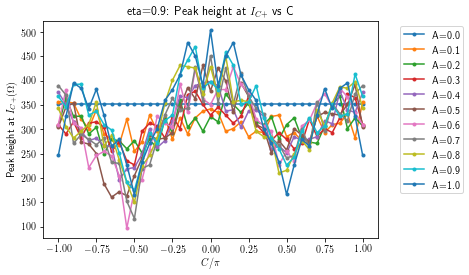

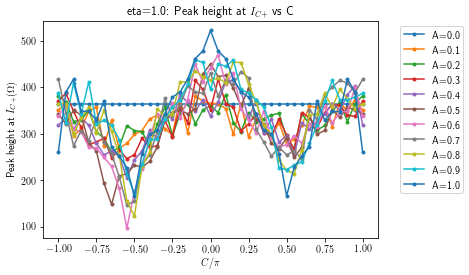

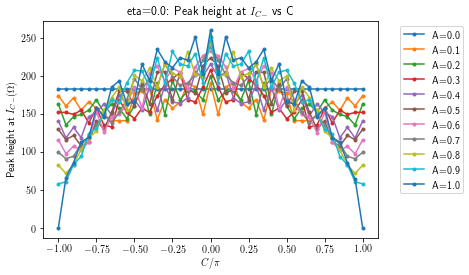

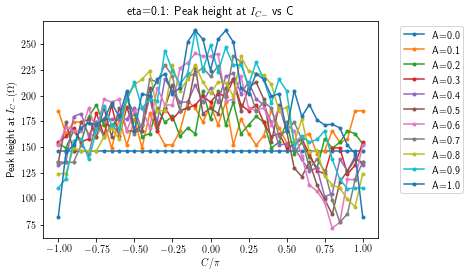

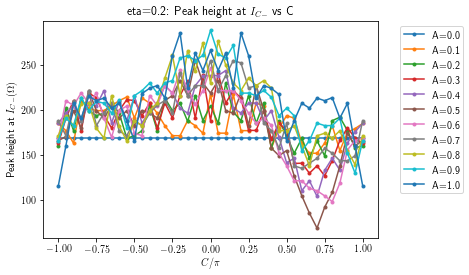

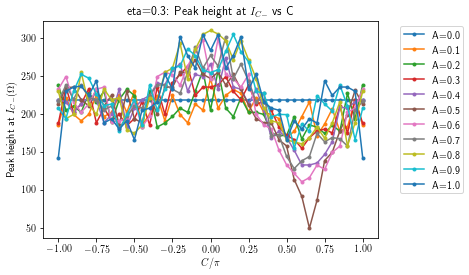

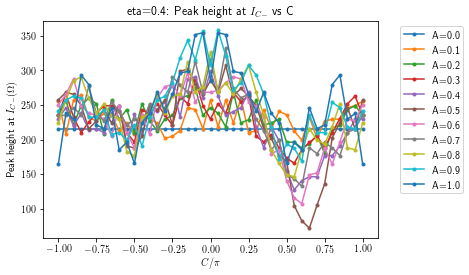

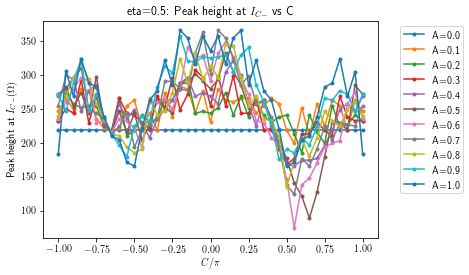

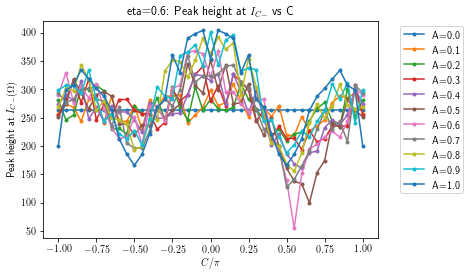

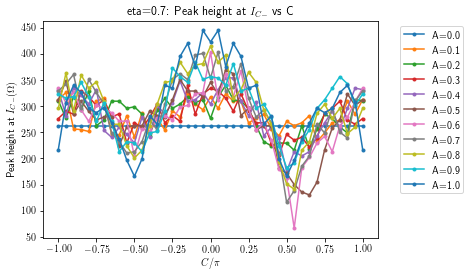

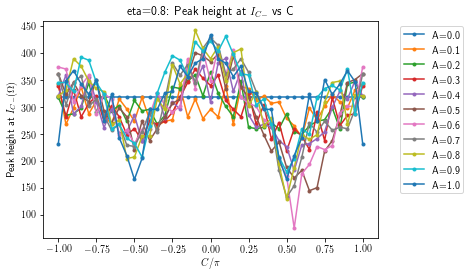

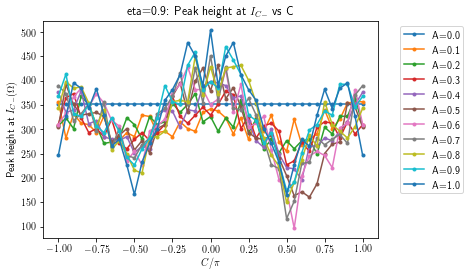

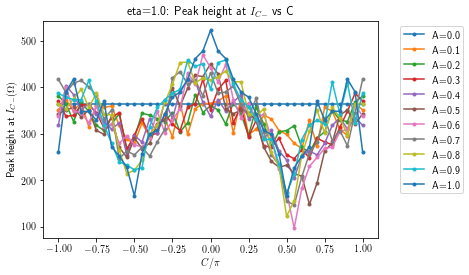

In [83]:
for j in range(0,11):
    plt.figure()
    for i in range(j,len(eta),11):
        plt.plot(C/np.pi,peak_p[:,i],'.-',label='A='+str(A[i]))

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('eta='+str(eta[j])+': Peak height at $I_{C+}$ vs C')
    plt.xlabel('$C/\pi$')
    plt.ylabel('Peak height at $I_{C+}(\Omega)$')
    plt.show()

for j in range(0,11):
    plt.figure()
    for i in range(j,len(eta),11):
        plt.plot(C/np.pi,peak_n[:,i],'.-',label='A='+str(A[i]))

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('eta='+str(eta[j])+': Peak height at $I_{C-}$ vs C')
    plt.xlabel('$C/\pi$')
    plt.ylabel('Peak height at $I_{C-}(\Omega)$')
    plt.show()

### Asymmetry

In [84]:
#np.dstack([eta,A])

### Asymmetry vs C, grouped by the same A

<Figure size 432x288 with 0 Axes>

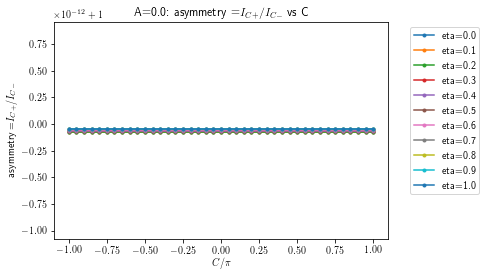

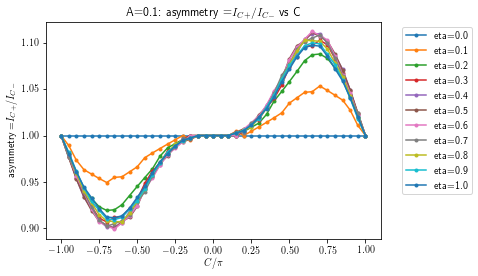

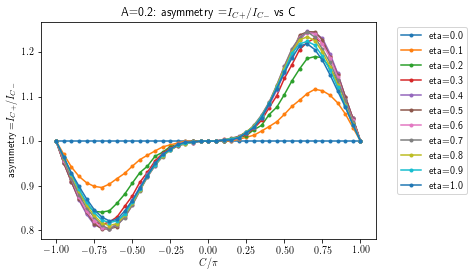

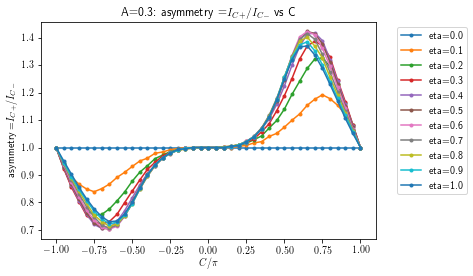

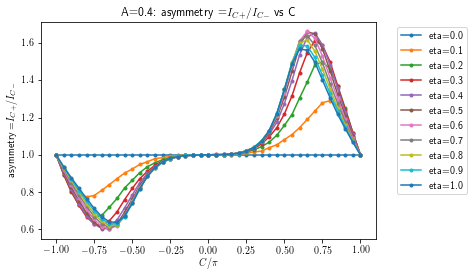

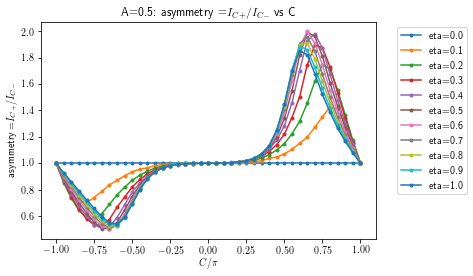

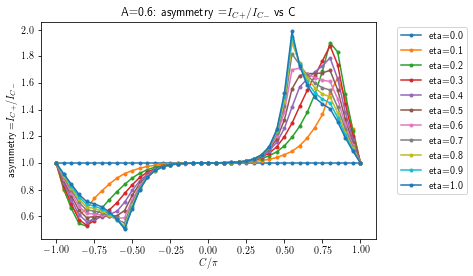

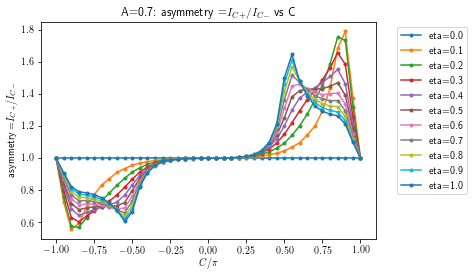

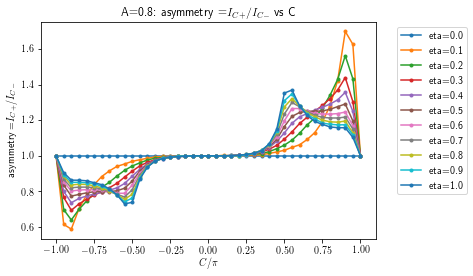

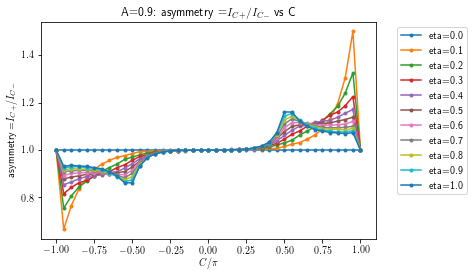

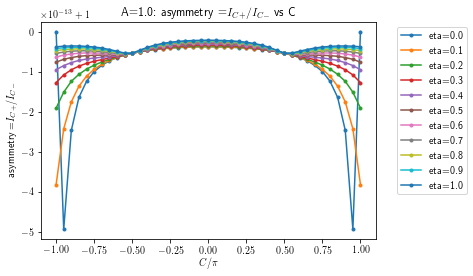

In [85]:
plt.figure()
for j in range(0,11):
    plt.figure()
    for i in range(0+j*11,(j+1)*11): 
        plt.plot(C/np.pi,asymmetry[:,i],'.-',label='eta='+str(eta[i]))

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('A='+str(A[0+j*11])+': asymmetry =$I_{C+}/I_{C-}$ vs C')
    plt.xlabel('$C/\pi$')
    plt.ylabel('asymmetry =$I_{C+}/I_{C-}$')
    plt.show()

### Asymmetry vs C, grouped by the same eta

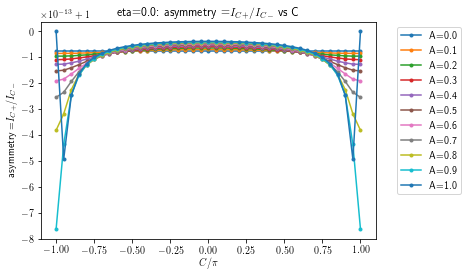

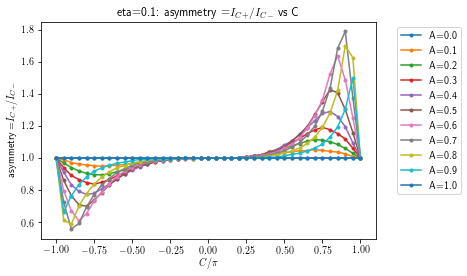

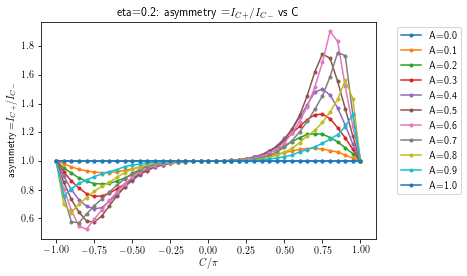

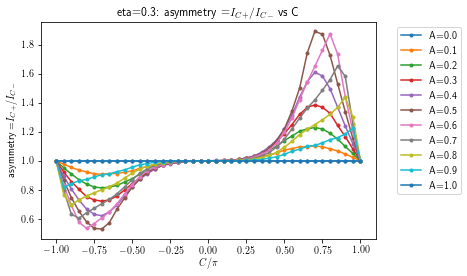

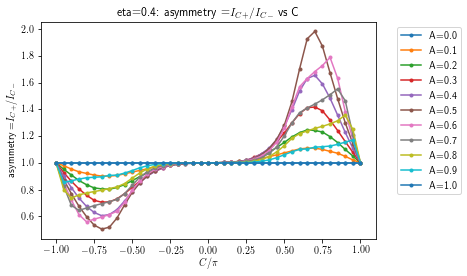

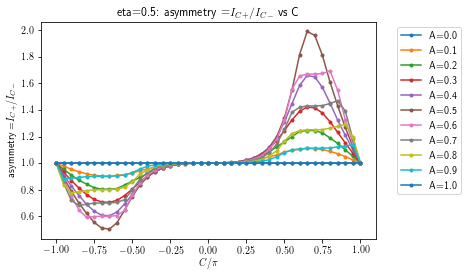

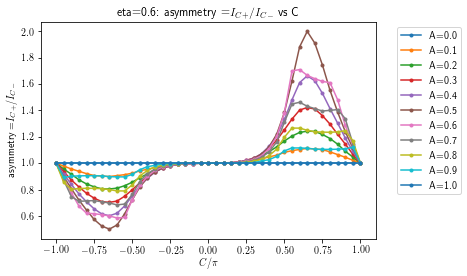

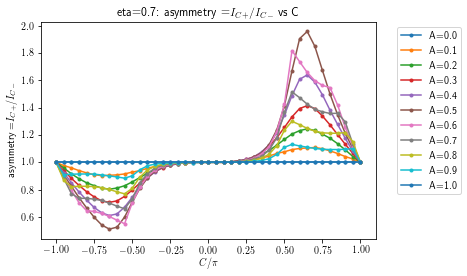

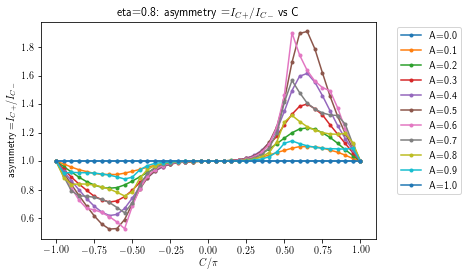

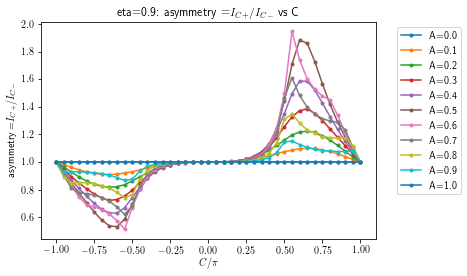

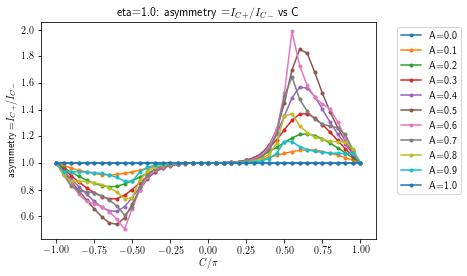

In [86]:
for j in range(0,11):
    plt.figure()
    for i in range(j,len(eta),11):
        plt.plot(C/np.pi,asymmetry[:,i],'.-',label='A='+str(A[i]))

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('eta='+str(eta[j])+': asymmetry =$I_{C+}/I_{C-}$ vs C')
    plt.xlabel('$C/\pi$')
    plt.ylabel('asymmetry =$I_{C+}/I_{C-}$')
    plt.show()

### $I_{C+}$ vs C, grouped by the same A

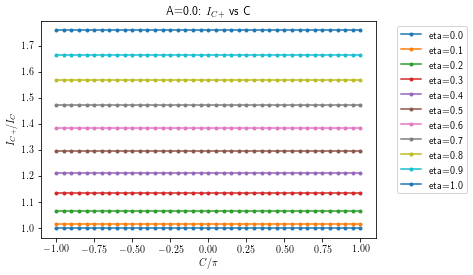

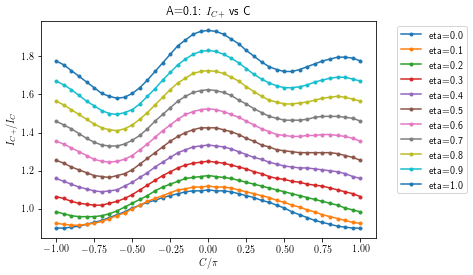

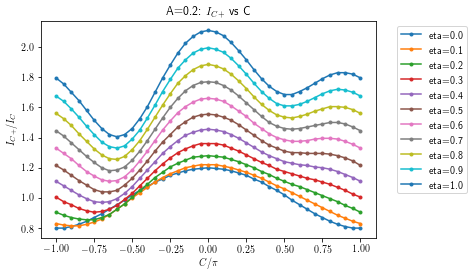

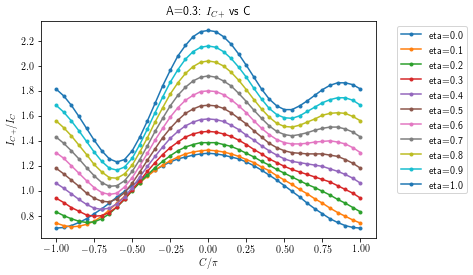

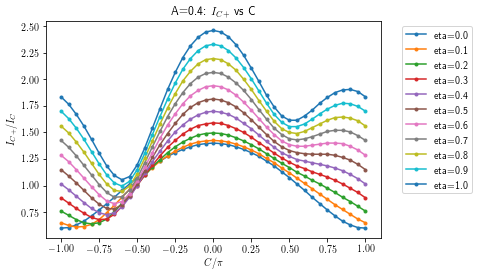

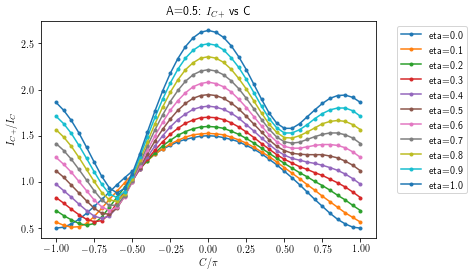

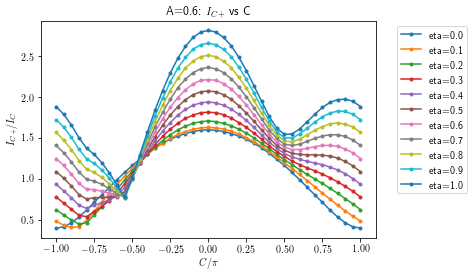

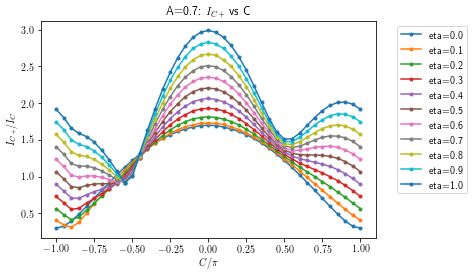

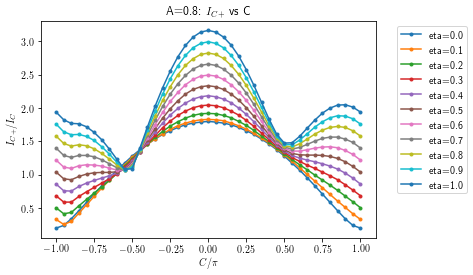

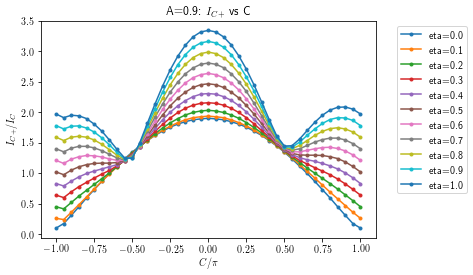

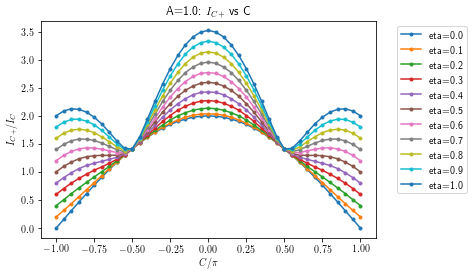

In [92]:
for j in range(0,11):
    plt.figure()
    for i in range(0+j*11,(j+1)*11): 
        plt.plot(C/np.pi,Icp[:,i]/Ic,'.-',label='eta='+str(eta[i]))
    plt.title('A='+str(A[0+j*11])+': $I_{C+}$ vs C')
    plt.xlabel('$C/\pi$')
    plt.ylabel('$I_{C+}/I_C$')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

### $I_{C-}$ vs C, grouped by the same A


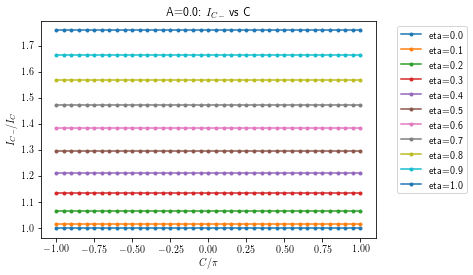

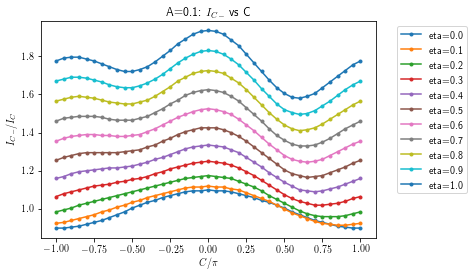

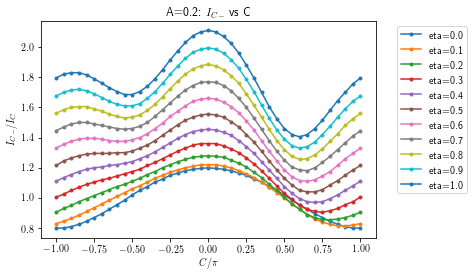

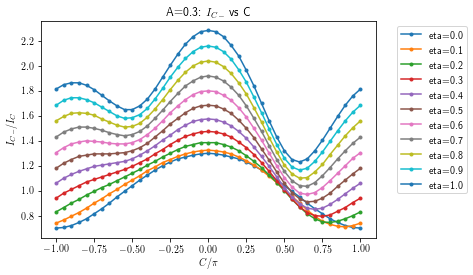

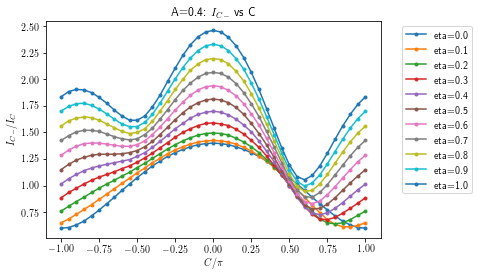

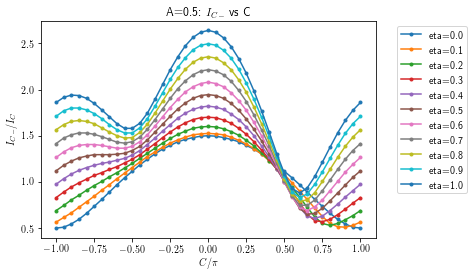

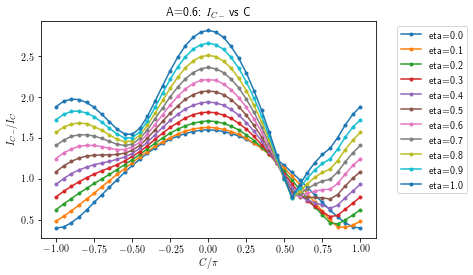

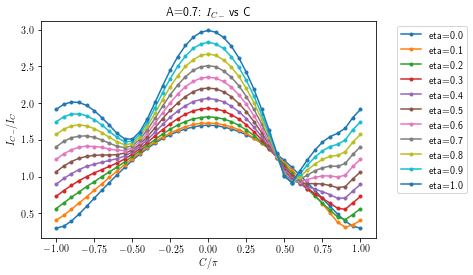

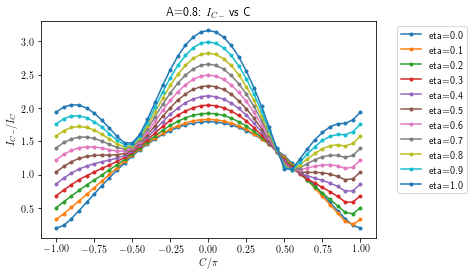

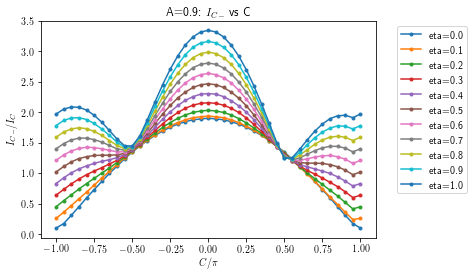

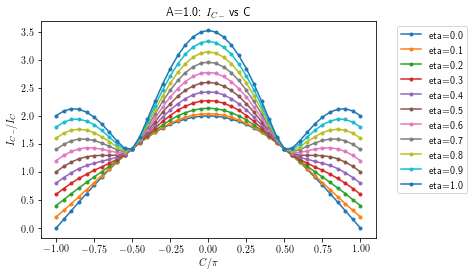

In [93]:
for j in range(0,11):
    plt.figure()
    for i in range(0+j*11,(j+1)*11): 
        plt.plot(C/np.pi,Icn[:,i]/Ic,'.-',label='eta='+str(eta[i]))
    plt.title('A='+str(A[0+j*11])+': $I_{C-}$ vs C')
    plt.xlabel('$C/\pi$')
    plt.ylabel('$I_{C-}/I_C$')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

## Individual mat file

In [58]:

    

#for i in range(0, len(mats)):
#    IDC_ mats[i]['eta'] mats[i]['A']

#data=loadmat("./several_eta_A/two_channels_A0.0_eta_0.0_step_0p005_41ptC.mat")

#IDC=np.squeeze(data['IDC'])
#C=np.squeeze(data['C'])
#V=data['V']
#DVDI=data['DVDI']
#Ic=2e-6
#Rn=13


#plt.figure()
#ax=plt.pcolor(C/np.pi,IDC/Ic,np.transpose(DVDI),cmap='inferno',linewidth=0,rasterized=True,shading='auto')
#plt.xlabel("$\delta/\pi$")
#plt.ylabel("$I_{DC}/I_C$")
#plt.colorbar()

#plt.title("$\sin(\phi)+\eta\sin(2\phi)+A\sin(\phi+C)+A\eta\sin(2\phi+C)$, varying C with constant $A=$"+str(A)+" and $\eta=$"+str(eta))
#plt.savefig("./eta0p7_A0p5/two_channels_A0p5_eta_0p7_step_0p005_41ptC.pdf")


TypeError: _vhstack_dispatcher() takes 1 positional argument but 4 were given

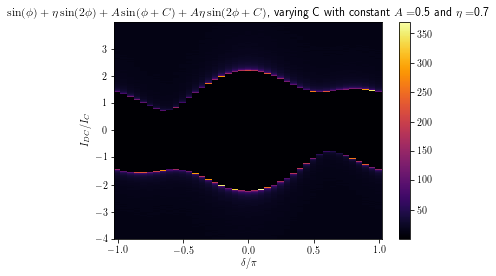

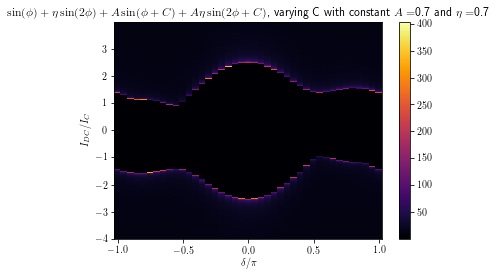

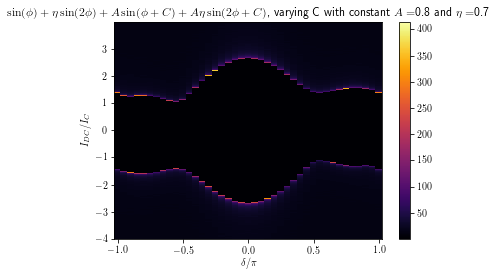

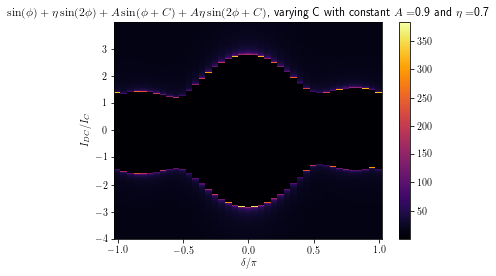

In [9]:
data_eta0p7_A0p5=loadmat("./eta0p7_A0p5/simulation_dVdI_vs_C_constant_A_0p5_eta_0p7_two_channels_step_0p005.mat")
data_eta0p7_A0p7=loadmat("./eta0p7_A0p7/simulation_dVdI_vs_C_constant_A_0p7_eta_0p7_two_channels_step_0p005.mat")
data_eta0p7_A0p8=loadmat("./eta0p7_A0p8/simulation_dVdI_vs_C_constant_A_0p8_eta_0p7_two_channels_step_0p005.mat")
data_eta0p7_A0p9=loadmat("./eta0p7_A0p9/simulation_dVdI_vs_C_constant_A_0p9_eta_0p7_two_channels_step_0p005.mat")

IDC=np.squeeze(data_eta0p7_A0p5['IDC'])
C=np.squeeze(data_eta0p7_A0p5['C'])
V05=data_eta0p7_A0p5['V']
V07=data_eta0p7_A0p7['V']
V08=data_eta0p7_A0p8['V']
V09=data_eta0p7_A0p9['V']

DVDI05=data_eta0p7_A0p5['DVDI']
DVDI07=data_eta0p7_A0p7['DVDI']
DVDI08=data_eta0p7_A0p8['DVDI']
DVDI09=data_eta0p7_A0p9['DVDI']

Ic=2e-6
Rn=13
eta=0.7


A=0.5
plt.figure()
ax=plt.pcolormesh(C/np.pi,IDC/Ic,np.transpose(DVDI05),cmap='inferno',linewidth=0,rasterized=True,shading='auto')
plt.xlabel("$\delta/\pi$")
plt.ylabel("$I_{DC}/I_C$")
plt.colorbar()

plt.title("$\sin(\phi)+\eta\sin(2\phi)+A\sin(\phi+C)+A\eta\sin(2\phi+C)$, varying C with constant $A=$"+str(A)+" and $\eta=$"+str(eta))
#plt.savefig("./eta0p7_A0p5/two_channels_A0p5_eta_0p7_step_0p005_41ptC.pdf")
plt.show()

A=0.7

plt.figure()
ax=plt.pcolormesh(C/np.pi,IDC/Ic,np.transpose(DVDI07),cmap='inferno',linewidth=0,rasterized=True,shading='auto')
plt.xlabel("$\delta/\pi$")
plt.ylabel("$I_{DC}/I_C$")
plt.colorbar()

plt.title("$\sin(\phi)+\eta\sin(2\phi)+A\sin(\phi+C)+A\eta\sin(2\phi+C)$, varying C with constant $A=$"+str(A)+" and $\eta=$"+str(eta))
#plt.savefig("./eta0p7_A0p5/two_channels_A0p5_eta_0p7_step_0p005_41ptC.pdf")
plt.show()

A=0.8

plt.figure()
ax=plt.pcolormesh(C/np.pi,IDC/Ic,np.transpose(DVDI08),cmap='inferno',linewidth=0,rasterized=True,shading='auto')
plt.xlabel("$\delta/\pi$")
plt.ylabel("$I_{DC}/I_C$")
plt.colorbar()

plt.title("$\sin(\phi)+\eta\sin(2\phi)+A\sin(\phi+C)+A\eta\sin(2\phi+C)$, varying C with constant $A=$"+str(A)+" and $\eta=$"+str(eta))
#plt.savefig("./eta0p7_A0p5/two_channels_A0p5_eta_0p7_step_0p005_41ptC.pdf")
plt.show()

A=0.9

plt.figure()
ax=plt.pcolormesh(C/np.pi,IDC/Ic,np.transpose(DVDI09),cmap='inferno',linewidth=0,rasterized=True,shading='auto')
plt.xlabel("$\delta/\pi$")
plt.ylabel("$I_{DC}/I_C$")
plt.colorbar()

plt.title("$\sin(\phi)+\eta\sin(2\phi)+A\sin(\phi+C)+A\eta\sin(2\phi+C)$, varying C with constant $A=$"+str(A)+" and $\eta=$"+str(eta))
#plt.savefig("./eta0p7_A0p5/two_channels_A0p5_eta_0p7_step_0p005_41ptC.pdf")
plt.show()

# Save it into a .csv file

In [74]:
np.savetxt("./eta0p7_A0p5/csv/IDC.csv", IDC, delimiter=",")
np.savetxt("./eta0p7_A0p5/csv/C.csv", C, delimiter=",")
np.savetxt("./eta0p7_A0p5/csv/V.csv", V, delimiter=",")
np.savetxt("./eta0p7_A0p5/csv/DVDI.csv", DVDI, delimiter=",")


In [75]:
print(C.shape)
print(IDC_array.shape)

(41,)
(1600,)


In [10]:
from scipy.signal import find_peaks


In [13]:
#A=0.5
Icn05=np.empty(len(C))
Icp05=np.empty(len(C))
peak_n05=np.empty(len(C))
peak_p05=np.empty(len(C))
asymmetry05=np.empty(len(C))
for i in range(0,len(C)):
    Index, Height=find_peaks(DVDI05[i,:],distance=200,height=50)
    
    Icn05[i]=np.abs(IDC[Index[0]])
    Icp05[i]=np.abs(IDC[Index[1]])
    asymmetry05[i]=Icp05[i]/Icn05[i]
    peak_n05[i]=Height['peak_heights'][0]
    peak_p05[i]=Height['peak_heights'][1]
    if(len(Index)>2):
        print("C= "+str(np.round(C[i]/np.pi,3))+"*pi has more than one peak: "+str(C[i])+" at "+str(Index))

In [14]:
#A=0.7
Icn07=np.empty(len(C))
Icp07=np.empty(len(C))
peak_n07=np.empty(len(C))
peak_p07=np.empty(len(C))
asymmetry07=np.empty(len(C))
for i in range(0,len(C)):
    Index, Height=find_peaks(DVDI07[i,:],distance=200,height=50)
    
    Icn07[i]=np.abs(IDC[Index[0]])
    Icp07[i]=np.abs(IDC[Index[1]])
    asymmetry07[i]=Icp07[i]/Icn07[i]
    peak_n07[i]=Height['peak_heights'][0]
    peak_p07[i]=Height['peak_heights'][1]
    if(len(Index)>2):
        print("C= "+str(np.round(C[i]/np.pi,3))+"*pi has more than one peak: "+str(C[i])+" at "+str(Index))

In [15]:
#A=0.8
Icn08=np.empty(len(C))
Icp08=np.empty(len(C))
peak_n08=np.empty(len(C))
peak_p08=np.empty(len(C))
asymmetry08=np.empty(len(C))
for i in range(0,len(C)):
    Index, Height=find_peaks(DVDI08[i,:],distance=200,height=50)
    
    Icn08[i]=np.abs(IDC[Index[0]])
    Icp08[i]=np.abs(IDC[Index[1]])
    asymmetry08[i]=Icp08[i]/Icn08[i]
    peak_n08[i]=Height['peak_heights'][0]
    peak_p08[i]=Height['peak_heights'][1]
    if(len(Index)>2):
        print("C= "+str(np.round(C[i]/np.pi,3))+"*pi has more than one peak: "+str(C[i])+" at "+str(Index))

In [16]:
#A=0.9
Icn09=np.empty(len(C))
Icp09=np.empty(len(C))
peak_n09=np.empty(len(C))
peak_p09=np.empty(len(C))
asymmetry09=np.empty(len(C))
for i in range(0,len(C)):
    Index, Height=find_peaks(DVDI09[i,:],distance=200,height=50)
    
    Icn09[i]=np.abs(IDC[Index[0]])
    Icp09[i]=np.abs(IDC[Index[1]])
    asymmetry09[i]=Icp09[i]/Icn09[i]
    peak_n09[i]=Height['peak_heights'][0]
    peak_p09[i]=Height['peak_heights'][1]
    if(len(Index)>2):
        print("C= "+str(np.round(C[i]/np.pi,3))+"*pi has more than one peak: "+str(C[i])+" at "+str(Index))

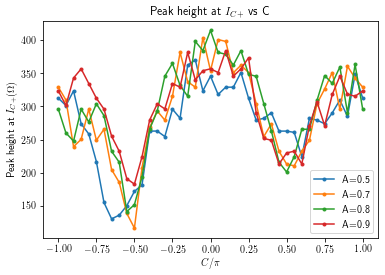

In [38]:
plt.figure()
plt.plot(C/np.pi,peak_p05,'.-',label='A=0.5')
plt.plot(C/np.pi,peak_p07,'.-',label='A=0.7')
plt.plot(C/np.pi,peak_p08,'.-',label='A=0.8')
plt.plot(C/np.pi,peak_p09,'.-',label='A=0.9')


#plt.plot(C/np.pi,np.flip(peak_n),'.',label='Peak height at $I_{C-}$, flipped, same as blue')
#plt.plot(C/np.pi,peak_n05,'.-',label='Peak height at $I_{C-}$')
plt.title('Peak height at $I_{C+}$ vs C')
plt.xlabel('$C/\pi$')
plt.ylabel('Peak height at $I_{C+}(\Omega)$')
plt.legend(loc=0)

#plt.figure()
#plt.plot(C/np.pi,peak_n/peak_p,'.-',label='Peak height ratio $I_{C-}/I_{C+}$')
#plt.xlabel('$C/\pi$')
#plt.ylabel('Peak height ratio $I_{C-}/I_{C+}$')


Text(0, 0.5, 'asymmetry =$I_{C+}/I_{C-}$')

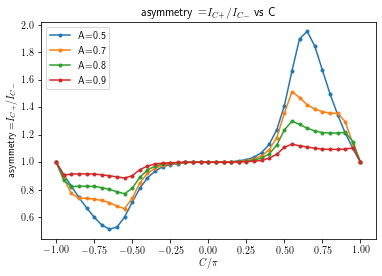

In [36]:
plt.figure()
plt.plot(C/np.pi,asymmetry05,'.-', label='A=0.5')
plt.plot(C/np.pi,asymmetry07,'.-', label='A=0.7')
plt.plot(C/np.pi,asymmetry08,'.-', label='A=0.8')
plt.plot(C/np.pi,asymmetry09,'.-', label='A=0.9')

plt.legend(loc=0)
plt.title('asymmetry =$I_{C+}/I_{C-}$ vs C')
plt.xlabel('$C/\pi$')
plt.ylabel('asymmetry =$I_{C+}/I_{C-}$')

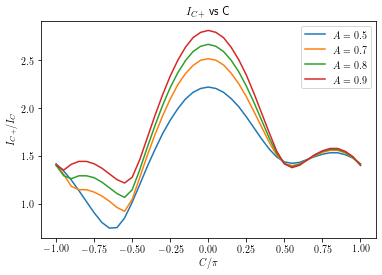

In [35]:
plt.figure()
plt.plot(C/np.pi,Icp05/Ic,label='$A=0.5$')
plt.plot(C/np.pi,Icp07/Ic,label='$A=0.7$')
plt.plot(C/np.pi,Icp08/Ic,label='$A=0.8$')
plt.plot(C/np.pi,Icp09/Ic,label='$A=0.9$')

#plt.plot(C/np.pi,Icn/Ic,label='$I_{C-}$')
plt.title('$I_{C+}$ vs C')
plt.xlabel('$C/\pi$')
plt.ylabel('$I_{C+}/I_C$')
plt.legend(loc=0)

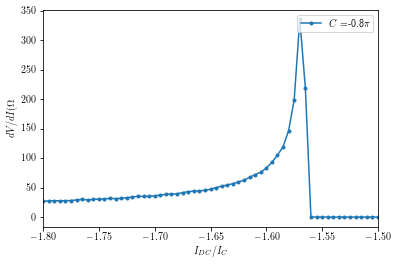

In [46]:
plt.figure()
plt.plot(IDC_array/Ic,DVDI[4,:],'.-',label='$C=$'+str(np.round(C[4]/np.pi,3))+"$\pi$")
plt.xlim([-1.8,-1.5])
plt.xlabel('$I_{DC}/I_C$')
plt.ylabel('$dV/dI(\Omega$')
plt.legend(loc=1)

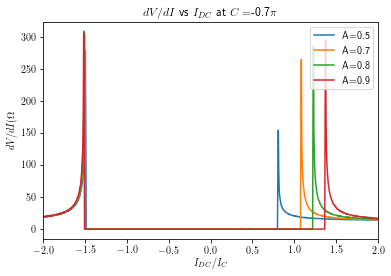

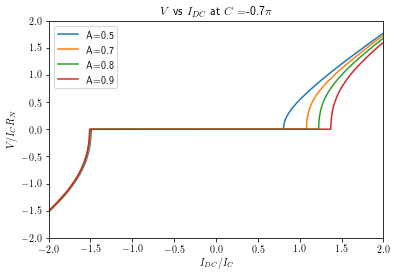

In [42]:
C_index=6
plt.figure()
plt.plot(IDC/Ic,DVDI05[C_index,:],'-',label='A=0.5')
plt.plot(IDC/Ic,DVDI07[C_index,:],'-',label='A=0.7')
plt.plot(IDC/Ic,DVDI08[C_index,:],'-',label='A=0.8')
plt.plot(IDC/Ic,DVDI09[C_index,:],'-',label='A=0.9')

plt.xlim([-2,2])
plt.title('$dV/dI$ vs $I_{DC}$ at $C=$'+str(np.round(C[C_index]/np.pi,4))+"$\pi$")
plt.xlabel('$I_{DC}/I_C$')
plt.ylabel('$dV/dI(\Omega$')
plt.legend(loc=1)


plt.figure()
plt.plot(IDC/Ic,V05[C_index,:]/Ic/Rn,'-',label='A=0.5')
plt.plot(IDC/Ic,V07[C_index,:]/Ic/Rn,'-',label='A=0.7')
plt.plot(IDC/Ic,V08[C_index,:]/Ic/Rn,'-',label='A=0.8')
plt.plot(IDC/Ic,V09[C_index,:]/Ic/Rn,'-',label='A=0.9')

plt.xlim([-2,2])
plt.ylim([-2,2])
plt.title('$V$ vs $I_{DC}$ at $C=$'+str(np.round(C[C_index]/np.pi,4))+"$\pi$")
plt.xlabel('$I_{DC}/I_C$')
plt.ylabel('$V/I_CR_N$')
plt.legend(loc=0)

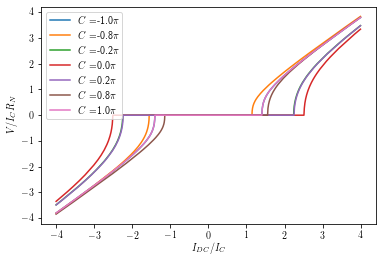

In [63]:
plt.figure()
#alist=[0,2,8,10,12,18,20]
alist=[0,4,16,20,24,36,40]

for i in alist :
    plt.plot(IDC_array/Ic,V[i,:]/Ic/Rn,'-',label='$C=$'+str(np.round(C[i]/np.pi,3))+"$\pi$")
#plt.xlim([-4,3])
#plt.ylim([-0.00005,0.000025])
plt.xlabel('$I_{DC}/I_C$')
plt.ylabel('$V/I_CR_N$')
plt.legend(loc=0)